In [2]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

import missingno as msno

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# Training the model on the train data
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics





# from imblearn.over_sampling import SMOTE, RandomOverSampler
# from imblearn.under_sampling import NearMiss, RandomUnderSampler
# from imblearn.combine import SMOTEENN, SMOTETomek

ImportError: dlopen(/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/_lib/_ccallback_c.cpython-39-darwin.so, 2): no suitable image found.  Did find:
	/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/_lib/_ccallback_c.cpython-39-darwin.so: mach-o, but wrong architecture
	/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/_lib/_ccallback_c.cpython-39-darwin.so: mach-o, but wrong architecture

### Reading CSV files

In [2]:
df_2014 = pd.read_csv("2014_Financial_Data.csv")
df_2015 = pd.read_csv("2015_Financial_Data.csv")
df_2016 = pd.read_csv("2016_Financial_Data.csv")
df_2017 = pd.read_csv("2017_Financial_Data.csv")
df_2018 = pd.read_csv("2018_Financial_Data.csv")

In [3]:
nasdaq = pd.read_csv("nasdaq.csv")

In [4]:
nasdaq.shape

(7998, 3)

In [5]:
nasdaq.columns

Index(['Symbol', 'Name', 'Country'], dtype='object')

In [6]:
nasdaq.head()

,Symbol,Name,Country
0,A,Agilent Technologies Inc. Common Stock,United States
1,AA,Alcoa Corporation Common Stock,NaN
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,NaN
3,AACG,ATA Creativity Global American Depositary Shares,China
4,AACIU,Armada Acquisition Corp. I Unit,United States


In [7]:
df_2014.shape

(3808, 225)

In [8]:
df_2015.shape

(4120, 225)

In [9]:
df_2016.shape

(4797, 225)

In [10]:
df_2017.shape

(4960, 225)

In [11]:
df_2018.shape

(4392, 225)

In [12]:
df_2014['Year'] = 2014
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018

In [13]:
df_2014.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       '2015 PRICE VAR [%]', 'Class', 'Year'],
      dtype='object', length=226)

In [14]:
df_2014.rename(columns={'2015 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2015.rename(columns={'2016 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2016.rename(columns={'2017 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2017.rename(columns={'2018 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2018.rename(columns={'2019 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)

In [15]:
df = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018], axis = 0)

In [16]:
df.shape

(22077, 226)

In [17]:
df.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       'Next_Year_Price_Var[%]', 'Class', 'Year'],
      dtype='object', length=226)

In [18]:
df.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Next_Year_Price_Var[%],Class,Year
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0,2014
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0,2014
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1,2014
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1,2014
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1,2014


In [19]:
df.rename(columns={"Unnamed: 0": "Symbol"}, inplace=True)
# df_2014.rename(columns={'2015 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)

In [20]:
df = pd.merge(df, nasdaq, how="inner", on="Symbol")

In [21]:
df.shape

(18703, 228)

In [22]:
df.head()

,Symbol,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Next_Year_Price_Var[%],Class,Year,Name,Country
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,...,0.0316,0.1228,0.0,-0.1746,Consumer Defensive,-9.323276,0,2014,Procter & Gamble Company (The) Common Stock,United States
1,PG,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.264400e+10,1.104900e+10,626000000.0,...,-0.1013,-0.1432,0.0,-0.0394,Consumer Defensive,10.809451,1,2015,Procter & Gamble Company (The) Common Stock,United States
2,PG,6.529900e+10,-0.0770,3.290900e+10,3.239000e+10,0.0,1.894900e+10,1.894900e+10,1.344100e+10,579000000.0,...,-0.0627,0.0083,0.0,-0.0809,Consumer Defensive,12.532463,1,2016,Procter & Gamble Company (The) Common Stock,United States
3,PG,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.0,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,...,0.0012,0.0325,0.0,-0.0156,Consumer Defensive,4.975151,1,2017,Procter & Gamble Company (The) Common Stock,United States
4,PG,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,0.0,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,...,-0.0357,-0.0097,0.0,0.0205,Consumer Defensive,40.680273,1,2018,Procter & Gamble Company (The) Common Stock,United States


In [23]:
df.Country.value_counts()

United States     14964
Canada              607
China               389
Israel              304
United Kingdom      190
Bermuda             156
Netherlands         102
Brazil               93
Ireland              80
Switzerland          76
Greece               75
Argentina            63
Mexico               60
India                53
France               49
Australia            46
South Korea          45
Cayman Islands       45
Taiwan               45
Germany              39
Hong Kong            37
Japan                35
Luxembourg           35
South Africa         35
Chile                30
Singapore            30
Denmark              23
Belgium              20
Spain                20
Monaco               15
Puerto Rico          15
Peru                 15
Sweden               15
Colombia             15
Italy                10
Russia               10
Curacao              10
Jersey               10
Panama               10
New Zealand           5
Turkey                5
Indonesia       

In [24]:
df.Country.isnull().sum()

787

In [25]:
#Next_Year_Price_Var[%] +ve ---> class = 1, if -ve -----> class = 0
df.drop('Next_Year_Price_Var[%]', axis=1, inplace=True)

In [26]:
df.rename(columns={"Symbol":"Name"}, inplace=True)

In [27]:
df.Name.nunique()

Name    4116
Name    4114
dtype: int64

In [28]:
df.shape

(18703, 227)

In [29]:
df.info

<bound method DataFrame.info of         Name       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1         PG  7.074900e+10         -0.0491     3.705600e+10  3.369300e+10   
2         PG  6.529900e+10         -0.0770     3.290900e+10  3.239000e+10   
3         PG  6.505800e+10         -0.0037     3.263800e+10  3.242000e+10   
4         PG  6.683200e+10          0.0273     3.443200e+10  3.240000e+10   
...      ...           ...             ...              ...           ...   
18698    BAK  1.494842e+10          0.0047     1.196681e+10  2.981610e+09   
18699    DNB  3.011000e+09             NaN     2.325000e+09  6.860000e+08   
18700   HYAC           NaN             NaN              NaN           NaN   
18701  HYACU           NaN             NaN              NaN           NaN   
18702    LCA  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   

       R&D Expenses  SG&A Expense  Operatin

In [30]:
df.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class,Year
count,1.786500e+04,17335.000000,1.739000e+04,1.784100e+04,1.719400e+04,1.746200e+04,1.740500e+04,1.792300e+04,1.738800e+04,1.778000e+04,...,15909.000000,17283.000000,17015.000000,17053.000000,16664.000000,16865.000000,16999.000000,17053.000000,18703.000000,18703.000000
mean,5.131141e+09,4.044478,3.194422e+09,2.017499e+09,1.099452e+08,9.257510e+08,1.427406e+09,6.293855e+08,9.737632e+07,5.375073e+08,...,0.018180,12.531312,0.153511,0.829158,0.871056,3.682542,0.296431,0.257921,0.563706,2016.085548
std,2.094265e+10,335.687819,1.515262e+10,8.058267e+09,8.007416e+08,3.954889e+09,5.768307e+09,2.986434e+09,4.666766e+08,2.587647e+09,...,0.262661,1183.058348,3.057425,43.258736,57.650800,184.199300,13.801622,3.901991,0.495938,1.378392
min,-6.276160e+08,-12.769300,-2.986888e+09,-1.280800e+10,-1.098000e+08,-1.401594e+08,-5.495512e+09,-1.933900e+10,-1.710954e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-1.000000,-379.478300,-1.051000,-2.662200,-2.369900,0.000000,2014.000000
25%,6.571986e+07,-0.011300,3.883750e+06,3.512800e+07,0.000000e+00,1.887951e+07,3.835900e+07,-2.692896e+06,0.000000e+00,-6.229009e+06,...,0.000000,-0.047100,0.000000,-0.025900,-0.093025,-0.064400,0.000000,-0.010900,0.000000,2015.000000
50%,4.771070e+08,0.058600,1.717705e+08,2.137290e+08,0.000000e+00,8.901150e+07,1.664520e+08,4.391900e+07,3.823064e+06,3.094914e+07,...,0.000000,0.010900,0.000000,0.049500,0.035300,0.000000,0.000000,0.060500,1.000000,2016.000000
75%,2.565486e+09,0.178700,1.333174e+09,9.678560e+08,1.265675e+07,4.091312e+08,6.747880e+08,2.880000e+08,5.092050e+07,2.287124e+08,...,0.049800,0.195450,0.064200,0.173500,0.141525,0.150300,0.000000,0.179300,1.000000,2017.000000
max,8.482620e+11,42138.663900,3.861020e+11,4.621600e+11,2.883700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,5.400500,153332.333300,293.473000,5468.426400,7039.325900,17646.823500,1542.611000,324.926800,1.000000,2018.000000


In [31]:
## Removing "Year" because our future companies will have different years and it should not affect our final call
df.drop("Year", axis=1, inplace=True)

In [32]:
## Removing "Name" because our future companies will have different Name and it should not affect our final call
df.drop("Name", axis=1, inplace=True)

In [33]:
df.head(2)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,Country
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,1.449400e+10,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0,-0.1746,Consumer Defensive,0,United States
1,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.264400e+10,1.104900e+10,626000000.0,9.761000e+09,...,-0.2847,-0.2634,-0.1024,-0.1013,-0.1432,0.0,-0.0394,Consumer Defensive,1,United States


In [34]:
df.loc[(df.Country=="United States")].shape

(14964, 224)

In [35]:
df.loc[(df.Country=="United States")]

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,Country
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,1.449400e+10,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0,-0.1746,Consumer Defensive,0,United States
1,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.264400e+10,1.104900e+10,626000000.0,9.761000e+09,...,-0.2847,-0.2634,-0.1024,-0.1013,-0.1432,0.0,-0.0394,Consumer Defensive,1,United States
2,6.529900e+10,-0.0770,3.290900e+10,3.239000e+10,0.0,1.894900e+10,1.894900e+10,1.344100e+10,579000000.0,1.385000e+10,...,-0.0427,-0.0528,-0.0182,-0.0627,0.0083,0.0,-0.0809,Consumer Defensive,1,United States
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.0,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,...,0.0505,-0.0195,-0.0529,0.0012,0.0325,0.0,-0.0156,Consumer Defensive,1,United States
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,0.0,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,...,0.0200,0.0247,-0.0174,-0.0357,-0.0097,0.0,0.0205,Consumer Defensive,1,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18697,NaN,NaN,NaN,3.648000e+09,NaN,NaN,7.947000e+09,2.206000e+09,-43000000.0,NaN,...,0.0827,0.0000,0.2680,0.2433,-0.0196,NaN,NaN,Consumer Cyclical,0,United States
18699,3.011000e+09,NaN,2.325000e+09,6.860000e+08,NaN,6.230000e+08,6.100000e+08,7.600000e+07,94000000.0,1.600000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Industrials,1,United States
18700,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+06,-5.000000e+06,NaN,1.000000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Industrials,1,United States
18701,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+06,-5.000000e+06,NaN,1.000000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Industrials,1,United States


In [36]:
df = df.loc[(df.Country=="United States")]

In [37]:
df.drop('Country', axis=1, inplace=True)

### Understanding Null Value Distribution

In [38]:
df.isnull().sum().sort_values(ascending=False)

cashConversionCycle               14964
operatingCycle                    14964
shortTermCoverageRatios            7418
priceEarningsToGrowthRatio         5473
dividendPayoutRatio                5473
                                  ...  
Operating Income                    725
Net cash flow / Change in cash      716
Financing Cash Flow                 699
Sector                                0
Class                                 0
Length: 223, dtype: int64

In [39]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

cashConversionCycle               100.000000
operatingCycle                    100.000000
shortTermCoverageRatios            49.572307
priceEarningsToGrowthRatio         36.574445
dividendPayoutRatio                36.574445
                                     ...    
Operating Income                    4.844961
Net cash flow / Change in cash      4.784817
Financing Cash Flow                 4.671211
Sector                              0.000000
Class                               0.000000
Length: 223, dtype: float64

In [40]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=True).head(15)

Class                             0.000000
Sector                            0.000000
Financing Cash Flow               4.671211
Net cash flow / Change in cash    4.784817
Operating Income                  4.844961
Receivables                       4.851644
Revenue                           4.998663
Earnings Before Tax Margin        5.052125
Gross Margin                      5.078856
Operating Cash Flow               5.145683
Gross Profit                      5.239241
Retained earnings (deficit)       5.339481
Cash and cash equivalents         5.352847
Earnings before Tax               5.526597
EPS                               5.593424
dtype: float64

In [41]:
# all cols have some null values
len(df.isnull().any())

223

In [42]:
# No columns with all null values
df.columns[df.isnull().all()]

Index(['operatingCycle', 'cashConversionCycle'], dtype='object')

In [43]:
# Defining a funtion to add the count/frequency values as annotation to histogram.
def annotate_graph(ax):
    for bar in ax.patches:         
        ax.annotate(format((bar.get_height()), '.0f'),                    
                    (bar.get_x() + bar.get_width() / 2,  bar.get_height()),                    
                    ha='center', va='center',                    
                    size=10, xytext=(0, 8),                    
                    textcoords='offset points')
    return ax

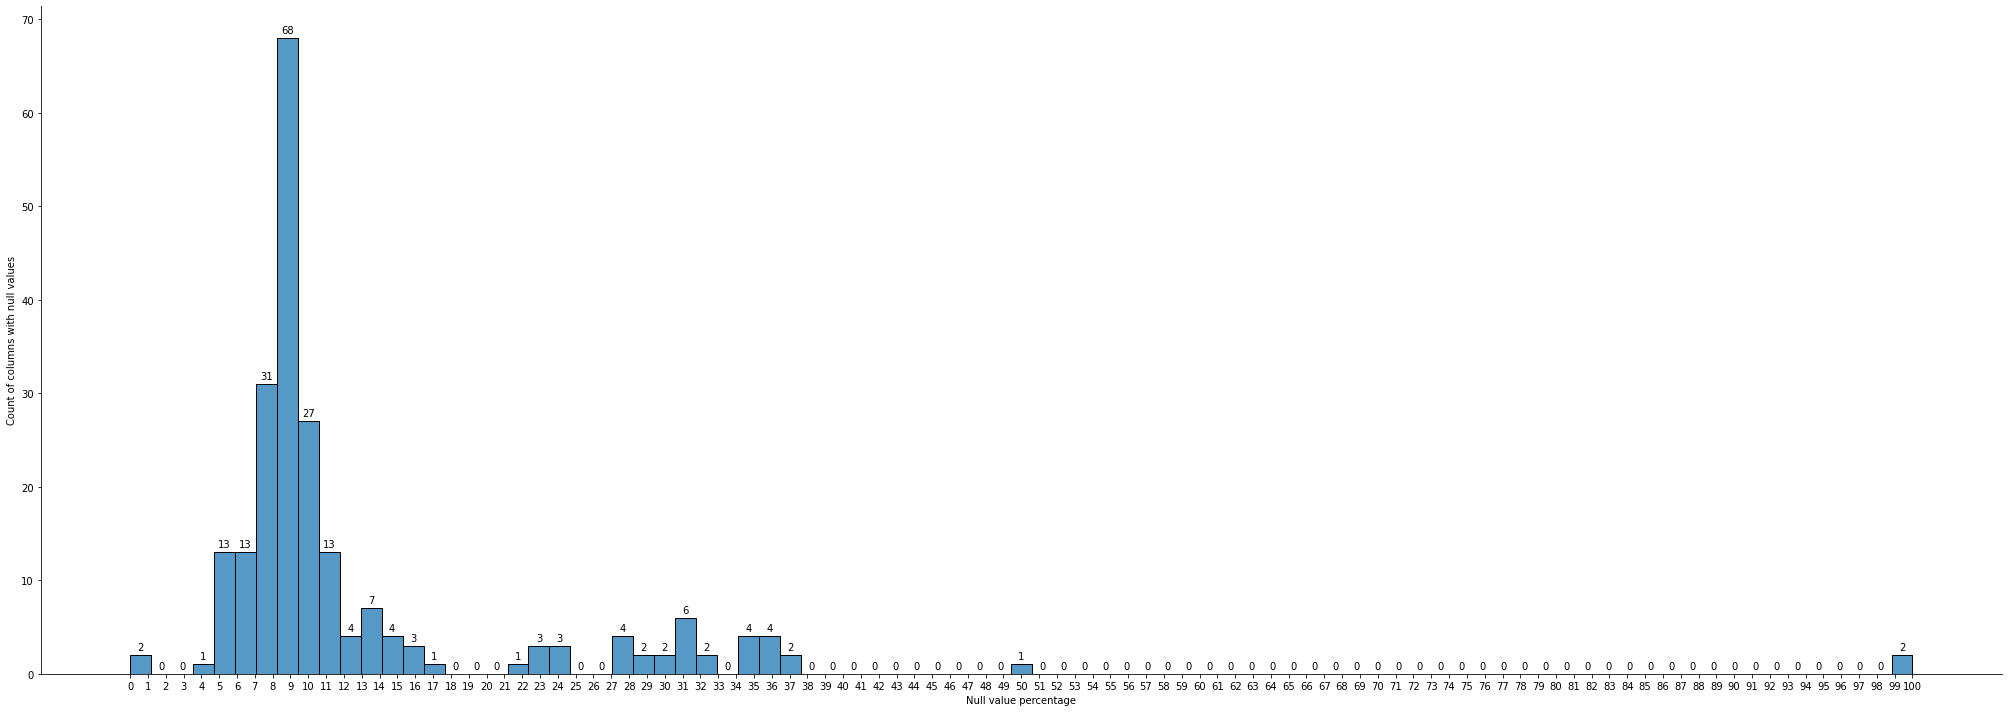

In [44]:
# Plotting histogram for the dataframe and columns having null values.
plt.figure(figsize=(28,10))

ax = sns.histplot(round((df.isnull().sum()/len(df.index) * 100).sort_values(ascending=False), 2))
ax = annotate_graph(ax)

ax.set(xticks=np.arange(0,101))
ax.set(xlabel='Null value percentage', ylabel='Count of columns with null values')
sns.despine()
plt.tight_layout()

<AxesSubplot:>

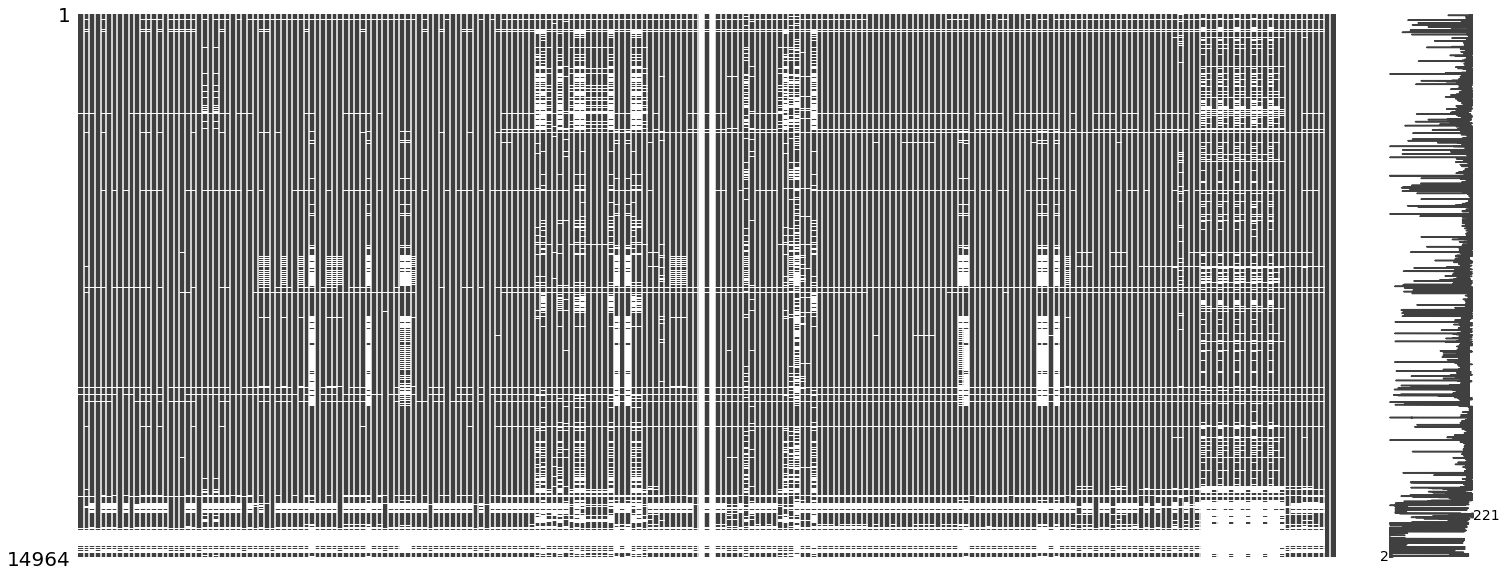

In [45]:
msno.matrix(df)

In [46]:
# defining a function to get more than cutoff percent missing value

def get_missing_value_percentage(cutoff):
    y = pd.DataFrame( round((df.isnull().sum()/len(df.index) * 100).sort_values(ascending=False), 2))
    y.rename(columns={0:"Percentage"}, inplace=True)
    y2 = y[y.Percentage>cutoff]
    return y2

In [47]:
# get columns with more than 70% missing values
greater_than_70 = get_missing_value_percentage(70)

In [48]:
len(greater_than_70)

2

In [49]:
greater_than_70

,Percentage
cashConversionCycle,100.0
operatingCycle,100.0


In [50]:
# get columns with more than 50% missing values
greater_than_50 = get_missing_value_percentage(50)

In [51]:
len(greater_than_50)

2

In [52]:
greater_than_50

,Percentage
cashConversionCycle,100.0
operatingCycle,100.0


In [53]:
# get columns with more than 20% missing values
greater_than_20 = get_missing_value_percentage(20)
greater_than_20

,Percentage
cashConversionCycle,100.00
operatingCycle,100.00
shortTermCoverageRatios,49.57
priceEarningsToGrowthRatio,36.57
dividendPayoutRatio,36.57
10Y Shareholders Equity Growth (per Share),36.44
10Y Net Income Growth (per Share),35.74
10Y Revenue Growth (per Share),35.74
10Y Operating CF Growth (per Share),35.52
effectiveTaxRate,34.60


### Removing Null Values

In [54]:
# function to drop cols which have more than 20% null values

def remove_cols_with_nulls (df, threshold):
    myCol = list(df.columns)
    for col in myCol: 
        percentage = (df[col].isnull().sum()/len(df[col]))*100
        if percentage>threshold:
            df.drop(col, axis=1, inplace=True)

In [55]:
df.shape

(14964, 223)

In [56]:
remove_cols_with_nulls(df, 20)

In [57]:
df.shape

(14964, 187)

In [58]:
len(df.columns[(df.isnull().any())])

185

In [59]:
# Deleting rows with any null value
df.dropna(how='all',axis=0, inplace=True) 

In [60]:
# Therefore, there is no row will all NULL values
df.shape

(14964, 187)

In [61]:
# Deleting rows with any null value
df.dropna(how='any',axis=0, inplace=True) 

In [62]:
df.shape

(9358, 187)

<AxesSubplot:>

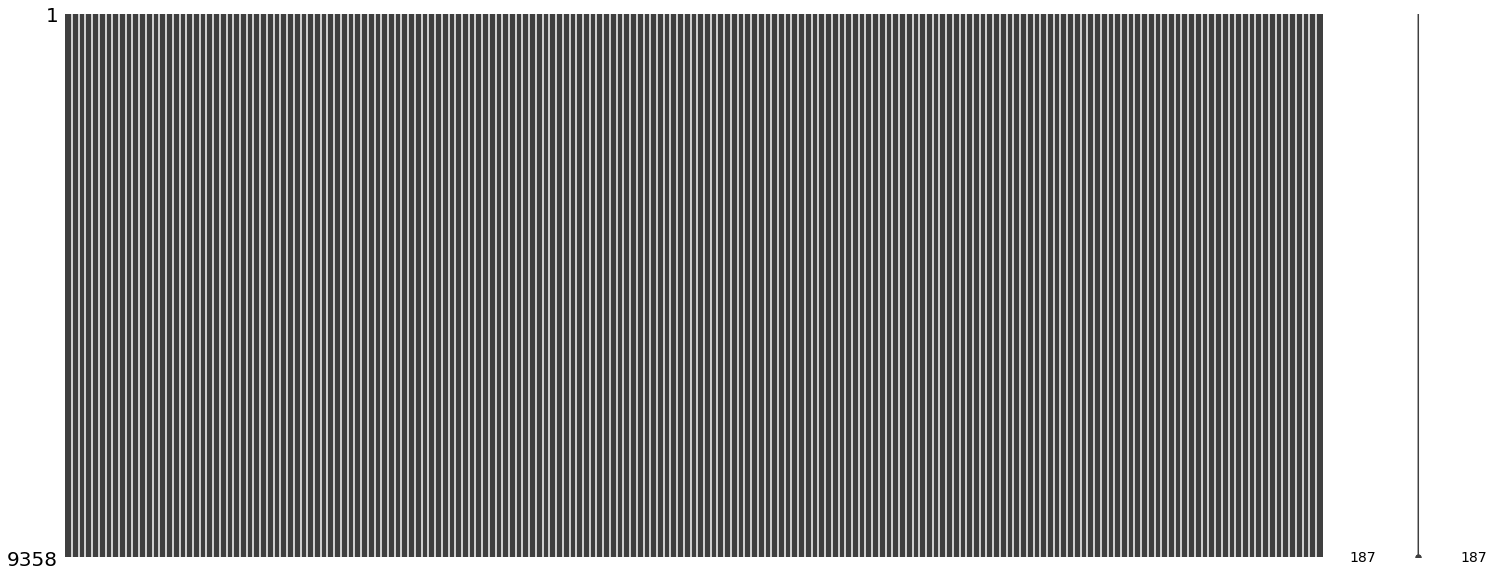

In [63]:
msno.matrix(df)

In [64]:
df.isnull().any().sum()

0

In [65]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       'Class'],
      dtype='object', length=187)

In [66]:
df.select_dtypes('number')

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Shareholders Equity Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.0,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,...,-0.0552,0.0329,0.0505,-0.0195,-0.0529,0.0012,0.0325,0.0000,-0.0156,1
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,0.0,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,...,-0.0328,0.0241,0.0200,0.0247,-0.0174,-0.0357,-0.0097,0.0000,0.0205,1
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,0.0,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,...,0.1781,0.1651,0.1344,0.0065,0.0415,0.0535,0.0254,0.0000,0.1293,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,0.0,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,...,0.2139,0.2650,0.3697,0.0844,0.1115,0.2797,0.0416,0.0000,0.0457,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,0.0,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,...,0.1073,0.1359,-0.0490,0.0637,0.0769,0.0071,0.1654,0.0000,0.0678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18678,8.271740e+08,0.5215,6.392980e+08,1.878760e+08,0.0,7.599300e+07,2.158220e+08,-2.794600e+07,22315000.0,-5.060800e+07,...,-0.0304,0.0000,0.5546,3.1131,0.9714,0.2623,0.7721,0.0000,0.5336,0
18682,4.134120e+08,0.0092,2.405600e+08,1.728520e+08,0.0,3.000500e+07,5.833300e+07,1.145190e+08,20694000.0,8.491100e+07,...,0.0853,0.0000,-0.2110,0.0000,0.0112,0.6327,-0.4436,0.0000,-0.1174,1
18691,1.901740e+08,0.5127,3.787500e+07,1.522990e+08,39379000.0,1.475440e+08,1.869230e+08,-3.462400e+07,0.0,-3.230900e+07,...,0.0000,0.0000,0.5777,0.0000,1.4482,1.7272,0.0000,0.1734,0.4790,1
18693,3.702738e+07,0.3446,2.569266e+07,1.133472e+07,4001757.0,1.050856e+07,1.451031e+07,-3.175589e+06,65693.0,-2.533062e+06,...,0.2799,0.0000,1.0298,0.8461,1.1314,0.8599,-0.5862,0.4892,0.6349,0


In [67]:
df['R&D Expenses'].value_counts()

0.000000e+00    6043
8.200000e+07       3
7.310000e+07       3
1.050000e+08       3
2.004000e+06       2
                ... 
5.787000e+09       1
2.730400e+08       1
3.635100e+07       1
5.170000e+05       1
5.570029e+06       1
Name: R&D Expenses, Length: 3238, dtype: int64

In [68]:
df.shape[0]

9358

In [69]:
df['R&D Expenses'].value_counts(normalize=True).sort_values(ascending=False)[0]

0.645757640521479

In [70]:
# more than 50% value of R&D expense is 0. Remove numeric cols with dominant values

In [71]:
df.operatingProfitMargin.value_counts().sort_values(ascending=False).iloc[0]

9358

In [72]:
#Code goes to except block when single value is met ---> which is SERIES and you cannot do simple indexing in SERIES

In [73]:
counter = 0
for col in list(df.select_dtypes('number').columns):
    try:  
        val = df[col].value_counts(normalize=True).sort_values(ascending=False)[0]
        if(val>0.5):
            df.drop(col, axis=1, inplace=True)
            counter = counter+1
    except:
        val = df[col].value_counts(normalize=True).sort_values(ascending=False).iloc[0]
        if(val>0.5):
            df.drop(col, axis=1, inplace=True)
            counter = counter+1
        
    
print("Total Columns Deleted = ",counter)

Total Columns Deleted =  15


In [74]:
df.shape

(9358, 172)

In [75]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       ...
       '3Y Net Income Growth (per Share)',
       '3Y Shareholders Equity Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'SG&A Expenses Growth', 'Sector', 'Class'],
      dtype='object', length=172)

In [76]:
df.select_dtypes(include='number')

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,3Y Operating CF Growth (per Share),3Y Net Income Growth (per Share),3Y Shareholders Equity Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,Class
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,3.063000e+09,...,-0.0112,0.1167,-0.0552,0.0505,-0.0195,-0.0529,0.0012,0.0325,-0.0156,1
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,3.465000e+09,...,0.0317,0.1435,-0.0328,0.0200,0.0247,-0.0174,-0.0357,-0.0097,0.0205,1
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0.2402,0.5114,0.1781,0.1344,0.0065,0.0415,0.0535,0.0254,0.1293,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0.2247,0.1455,0.2139,0.3697,0.0844,0.1115,0.2797,0.0416,0.0457,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0.0927,0.1237,0.1073,-0.0490,0.0637,0.0769,0.0071,0.1654,0.0678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18678,8.271740e+08,0.5215,6.392980e+08,1.878760e+08,7.599300e+07,2.158220e+08,-2.794600e+07,22315000.0,-5.060800e+07,2.375000e+06,...,-0.2987,0.0000,-0.0304,0.5546,3.1131,0.9714,0.2623,0.7721,0.5336,0
18682,4.134120e+08,0.0092,2.405600e+08,1.728520e+08,3.000500e+07,5.833300e+07,1.145190e+08,20694000.0,8.491100e+07,2.120700e+07,...,0.3226,1.2723,0.0853,-0.2110,0.0000,0.0112,0.6327,-0.4436,-0.1174,1
18691,1.901740e+08,0.5127,3.787500e+07,1.522990e+08,1.475440e+08,1.869230e+08,-3.462400e+07,0.0,-3.230900e+07,1.337000e+06,...,0.0000,0.0000,0.0000,0.5777,0.0000,1.4482,1.7272,0.0000,0.4790,1
18693,3.702738e+07,0.3446,2.569266e+07,1.133472e+07,1.050856e+07,1.451031e+07,-3.175589e+06,65693.0,-2.533062e+06,-1.396784e+06,...,0.0000,0.0000,0.2799,1.0298,0.8461,1.1314,0.8599,-0.5862,0.6349,0


In [77]:
df.select_dtypes(include='object')

,Sector
3,Consumer Defensive
4,Consumer Defensive
11,Consumer Defensive
12,Consumer Defensive
13,Consumer Defensive
...,...
18678,Energy
18682,Financial Services
18691,Technology
18693,Technology


In [78]:
df.select_dtypes(include='number').shape

(9358, 171)

In [79]:
df.select_dtypes(include='object').shape

(9358, 1)

In [80]:
df.select_dtypes(include='category').shape

(9358, 0)

In [81]:
df.shape

(9358, 172)

In [82]:
# 155 cols ----> 154 number, 1 Object

In [83]:
df.Sector.value_counts()

Technology                1624
Industrials               1511
Healthcare                1367
Financial Services        1304
Consumer Cyclical         1239
Basic Materials            498
Real Estate                495
Consumer Defensive         462
Energy                     461
Utilities                  293
Communication Services     104
Name: Sector, dtype: int64

In [84]:
sector_list = list(df.Sector.unique())

In [85]:
sector_list

['Consumer Defensive',
 'Basic Materials',
 'Healthcare',
 'Consumer Cyclical',
 'Industrials',
 'Real Estate',
 'Communication Services',
 'Energy',
 'Financial Services',
 'Utilities',
 'Technology']

In [86]:
pd.get_dummies(df.Sector, drop_first=True)

,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
11,0,0,1,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0
13,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18678,0,0,0,1,0,0,0,0,0,0
18682,0,0,0,0,1,0,0,0,0,0
18691,0,0,0,0,0,0,0,0,1,0
18693,0,0,0,0,0,0,0,0,1,0


In [87]:
Sector_status = pd.get_dummies(df.Sector, drop_first=True)

#Adding the result to the original housing dataframe

df = pd.concat([df, Sector_status], axis=1)


In [88]:
df.shape

(9358, 182)

In [89]:
df.Energy.value_counts()

0    8897
1     461
Name: Energy, dtype: int64

In [90]:
# Sector Column will be dropped after Exploratory Data Analysis

In [91]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,3.063000e+09,...,0,0,1,0,0,0,0,0,0,0
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,3.465000e+09,...,0,0,1,0,0,0,0,0,0,0
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0,0,1,0,0,0,0,0,0,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0,0,1,0,0,0,0,0,0,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0,0,1,0,0,0,0,0,0,0


# Removing columns with single value

In [92]:
def removeSingleValue (col):
    length = len(df[col].value_counts())
    if (length<2):
        print(col)
        df.drop(col, axis=1, inplace=True)

In [93]:
for col in df.columns:
    removeSingleValue(col)

In [94]:
num_col = list(df.dtypes[df.dtypes !='object'].index)

In [95]:
len(num_col)

181

In [96]:
df.shape

(9358, 182)

### Duplicate Row Checker

In [97]:
df.duplicated().sum()

0

In [98]:
# Moving "Class" Column to end
df['Result'] = df.Class
df.drop("Class", axis=1, inplace=True)
df = df.rename(columns={"Result":"Class"})

In [99]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Class
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,3.063000e+09,...,0,1,0,0,0,0,0,0,0,1
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,3.465000e+09,...,0,1,0,0,0,0,0,0,0,1
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0,1,0,0,0,0,0,0,0,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0,1,0,0,0,0,0,0,0,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0,1,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

In [100]:
# Get number of positve and negative examples
pos = df[df["Class"] == 1].shape[0]
neg = df[df["Class"] == 0].shape[0]

print("Profitable Companies = ",pos)
print("Lossy Companies = ",neg)

Profitable Companies =  5498
Lossy Companies =  3860


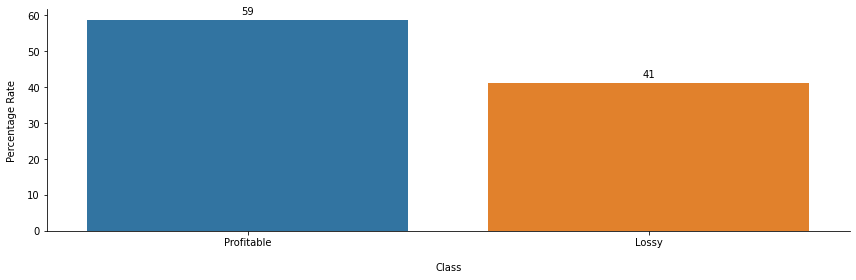

In [101]:
# Plotting the profitable vs non-profitable customers.
plt.figure(figsize = (12, 4))

length = len(df)
ax = sns.barplot(x = ['Profitable','Lossy'], y = [pos/length * 100,neg/length * 100])
plt.xlabel("Class", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)

# Call Custom Function
annotate_graph(ax)


sns.despine()
plt.tight_layout()
plt.show()

In [102]:
# Therefore, the output class is balanced

In [103]:
corr_df = pd.DataFrame(df.corr()['Class'].sort_values(ascending = False))

In [104]:
positive_corr = corr_df.loc[(corr_df.Class>0) & (corr_df.Class<1)]

In [105]:
negative_corr = corr_df.loc[corr_df.Class<0]

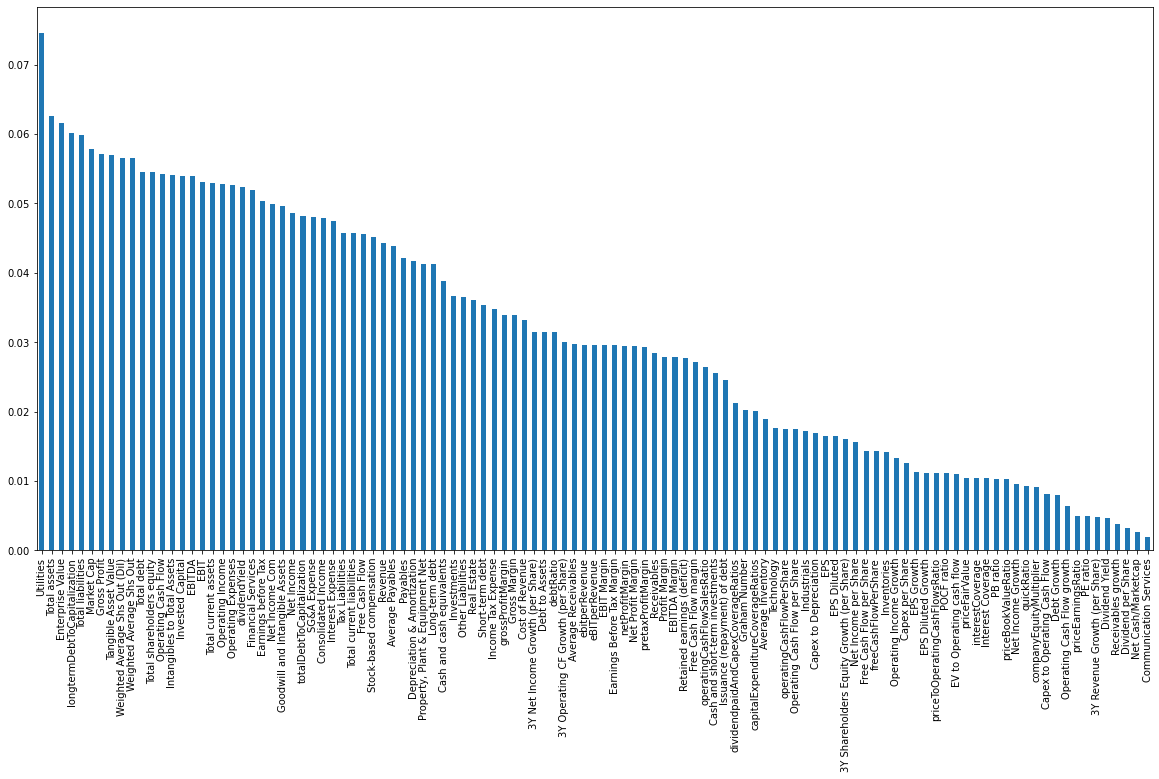

In [106]:
# Creating bar chart for showing co-relation of all variables with Class.
plt.figure(figsize=(20,10))
positive_corr.Class.plot(kind = 'bar')
plt.show()

In [107]:
positive_corr=positive_corr.reset_index()

In [108]:
positive_corr

,index,Class
0,Utilities,0.074608
1,Total assets,0.062575
2,Enterprise Value,0.061636
3,longtermDebtToCapitalization,0.060150
4,Total liabilities,0.059822
...,...,...
106,Dividend Yield,0.004662
107,Receivables growth,0.003833
108,Dividend per Share,0.003227
109,Net Cash/Marketcap,0.002570


In [109]:
positive_corr = positive_corr.rename(columns={"index":"col_name"})

In [110]:
positive_corr

,col_name,Class
0,Utilities,0.074608
1,Total assets,0.062575
2,Enterprise Value,0.061636
3,longtermDebtToCapitalization,0.060150
4,Total liabilities,0.059822
...,...,...
106,Dividend Yield,0.004662
107,Receivables growth,0.003833
108,Dividend per Share,0.003227
109,Net Cash/Marketcap,0.002570


In [111]:
top_pos_index = list(positive_corr.col_name[0:6])

In [112]:
top_pos_index

['Utilities',
 'Total assets',
 'Enterprise Value',
 'longtermDebtToCapitalization',
 'Total liabilities',
 'Market Cap']

In [113]:
top_pos_index.remove("Utilities")
# top_pos_index.remove("Financial Services")

In [114]:
printThis = df[top_pos_index]
printThis['Class'] = df.Class

[]

<Figure size 1440x864 with 0 Axes>

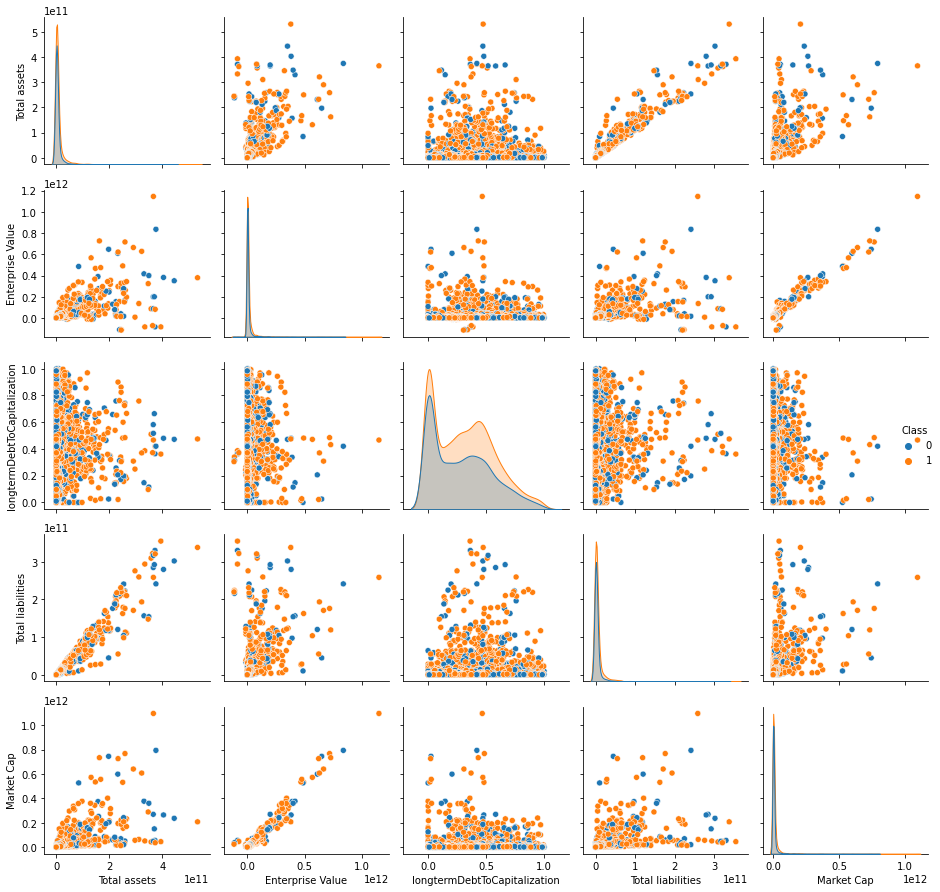

In [115]:
# Plotting most positively related cols

plt.figure(figsize=(20,12))
sns.pairplot(printThis, hue="Class")
sns.despine()
plt.tight_layout()


plt.plot()

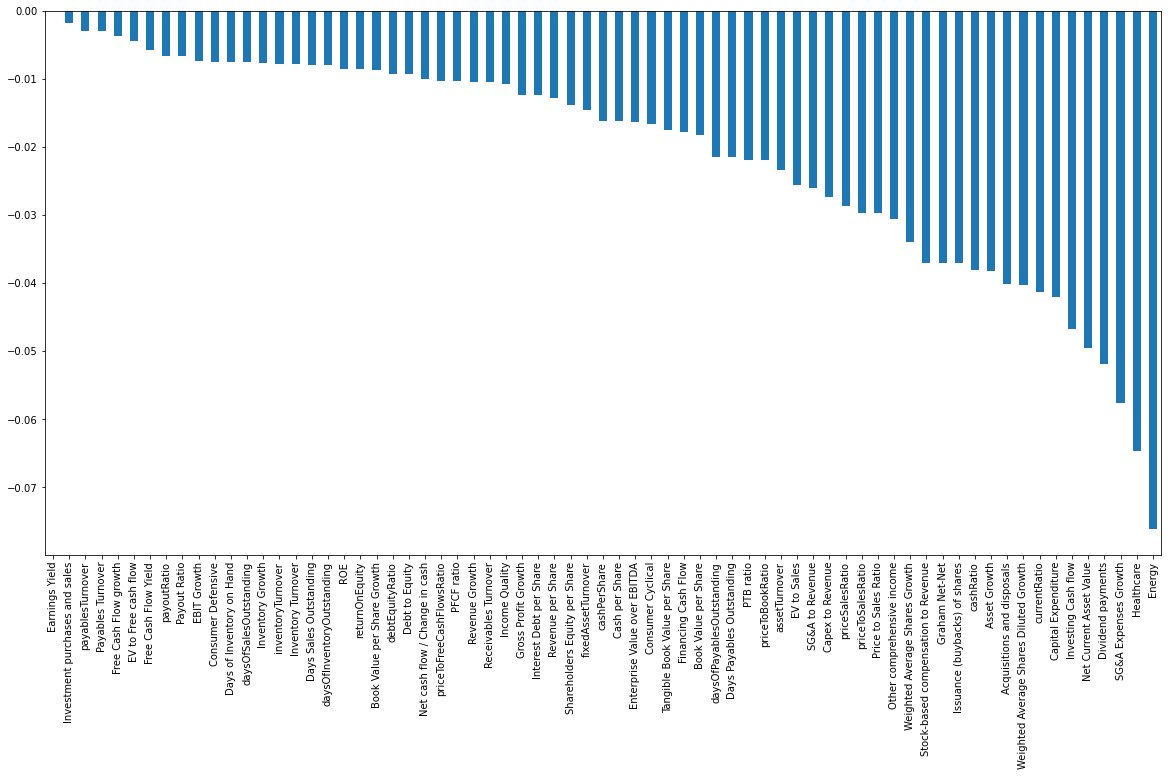

In [116]:
# Creating bar chart for showing co-relation of all variables with Class.
plt.figure(figsize=(20,10))
negative_corr.Class.plot(kind = 'bar')
plt.show()

In [117]:
negative_corr=negative_corr.reset_index()

In [118]:
negative_corr

,index,Class
0,Earnings Yield,-0.000021
1,Investment purchases and sales,-0.001704
2,payablesTurnover,-0.002894
3,Payables Turnover,-0.002894
4,Free Cash Flow growth,-0.003691
...,...,...
64,Net Current Asset Value,-0.049501
65,Dividend payments,-0.051917
66,SG&A Expenses Growth,-0.057578
67,Healthcare,-0.064619


In [119]:
negative_corr = negative_corr.rename(columns={"index":"col_name"})

In [120]:
negative_corr

,col_name,Class
0,Earnings Yield,-0.000021
1,Investment purchases and sales,-0.001704
2,payablesTurnover,-0.002894
3,Payables Turnover,-0.002894
4,Free Cash Flow growth,-0.003691
...,...,...
64,Net Current Asset Value,-0.049501
65,Dividend payments,-0.051917
66,SG&A Expenses Growth,-0.057578
67,Healthcare,-0.064619


In [121]:
top_neg_index = list(negative_corr.col_name[0:4])

In [122]:
top_neg_index

['Earnings Yield',
 'Investment purchases and sales',
 'payablesTurnover',
 'Payables Turnover']

In [123]:
printThis2 = df[top_neg_index]
printThis2['Class'] = df.Class

[]

<Figure size 1440x864 with 0 Axes>

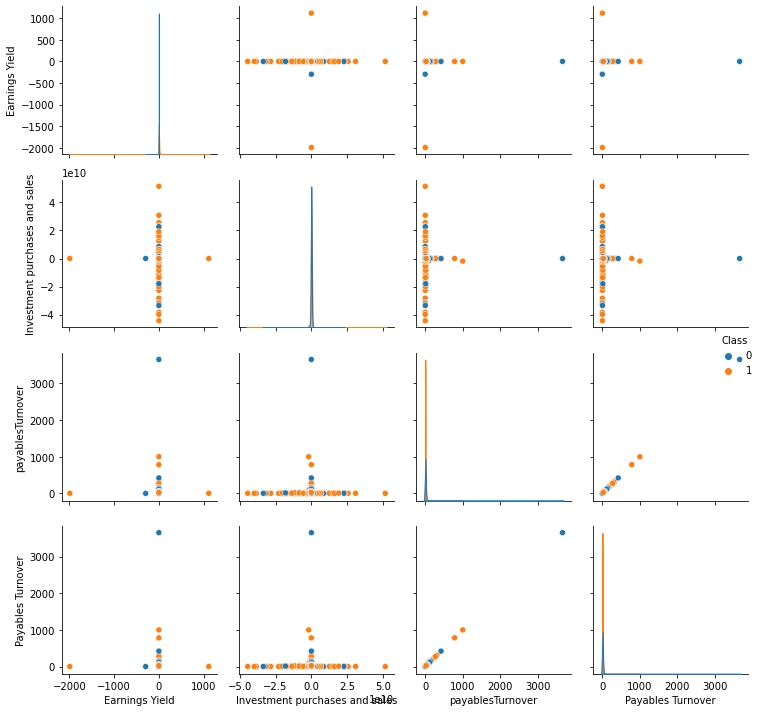

In [124]:
# Plotting most positively related cols

plt.figure(figsize=(20,12))
sns.pairplot(printThis2, hue="Class")
sns.despine()
plt.tight_layout()


plt.plot()

In [125]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       ...
       'Consumer Cyclical', 'Consumer Defensive', 'Energy',
       'Financial Services', 'Healthcare', 'Industrials', 'Real Estate',
       'Technology', 'Utilities', 'Class'],
      dtype='object', length=182)

In [126]:
plotHelper = pd.DataFrame()
col_name = []
mean = []
std = []
for col in df.select_dtypes(include = np.number).columns.to_list():
    col_name.append(col)
    mean.append(df[col].mean())
    std.append(df[col].std())

In [127]:
plotHelper['col_name']=col_name
plotHelper['mean']=mean
plotHelper['std']=std

In [128]:
plotHelper

,col_name,mean,std
0,Revenue,5.001405e+09,1.962738e+10
1,Revenue Growth,6.586942e+00,4.555124e+02
2,Cost of Revenue,3.202846e+09,1.458659e+10
3,Gross Profit,1.797726e+09,6.696906e+09
4,SG&A Expense,8.373665e+08,3.493866e+09
...,...,...,...
176,Industrials,1.614661e-01,3.679800e-01
177,Real Estate,5.289592e-02,2.238377e-01
178,Technology,1.735414e-01,3.787348e-01
179,Utilities,3.131011e-02,1.741638e-01


In [129]:
plotHelper = plotHelper.loc[~(plotHelper.col_name=="Class")]

In [130]:
plotHelper

,col_name,mean,std
0,Revenue,5.001405e+09,1.962738e+10
1,Revenue Growth,6.586942e+00,4.555124e+02
2,Cost of Revenue,3.202846e+09,1.458659e+10
3,Gross Profit,1.797726e+09,6.696906e+09
4,SG&A Expense,8.373665e+08,3.493866e+09
...,...,...,...
175,Healthcare,1.460782e-01,3.532035e-01
176,Industrials,1.614661e-01,3.679800e-01
177,Real Estate,5.289592e-02,2.238377e-01
178,Technology,1.735414e-01,3.787348e-01


In [131]:
plotHelper.sort_values(by="mean", ascending=True)

,col_name,mean,std
137,Net Current Asset Value,-3.731023e+09,1.562590e+10
53,Investing Cash flow,-5.694209e+08,2.762323e+09
50,Capital Expenditure,-3.304488e+08,1.385220e+09
42,Other comprehensive income,-2.078700e+08,1.232136e+09
56,Dividend payments,-1.747937e+08,7.951450e+08
...,...,...,...
136,Tangible Asset Value,7.325377e+09,2.510921e+10
138,Invested Capital,7.696451e+09,2.588781e+10
34,Total assets,9.055169e+09,2.940055e+10
108,Market Cap,9.128916e+09,3.737446e+10


In [132]:
top_mean = list(plotHelper.sort_values(by="mean",ascending=False).col_name[0:5])

In [133]:
bottom_mean = list(plotHelper.sort_values(by="mean", ascending=True).col_name[0:5])

In [134]:
top_std = list(plotHelper.sort_values(by="std",ascending=False).col_name[0:5])

In [135]:
bottom_std = list(plotHelper.sort_values(by="std",ascending=True).col_name[0:5])

In [136]:
top_mean

['Enterprise Value',
 'Market Cap',
 'Total assets',
 'Invested Capital',
 'Tangible Asset Value']

[]

<Figure size 1440x864 with 0 Axes>

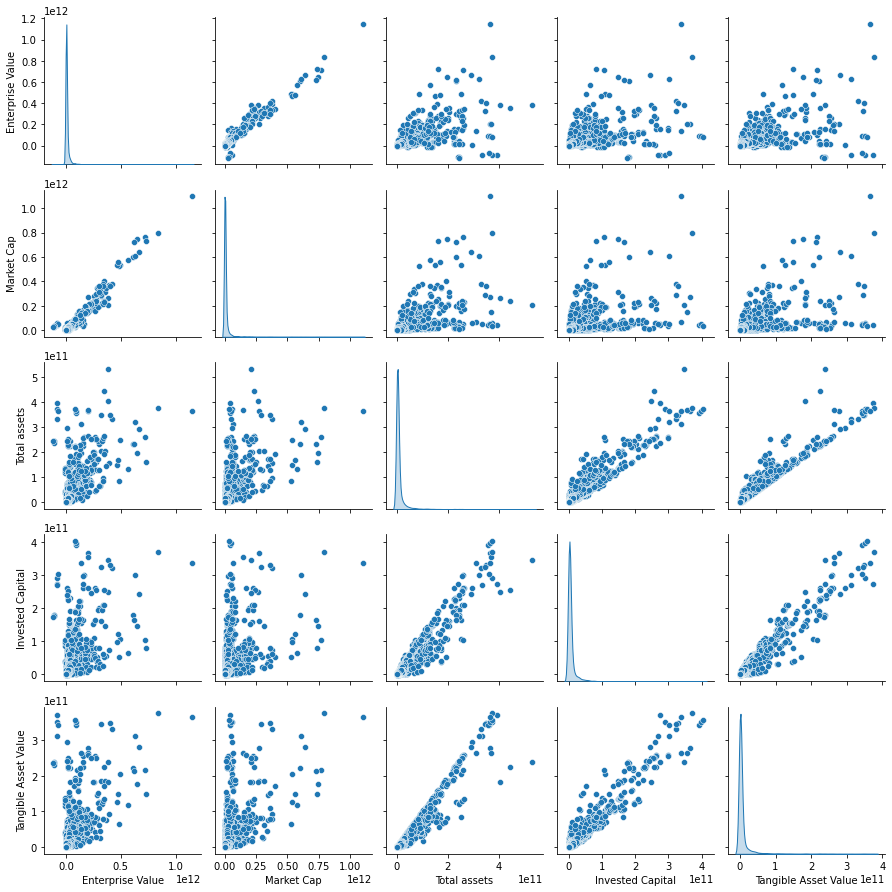

In [137]:
# Plotting cols with highest mean

plt.figure(figsize=(20,12))
sns.pairplot(df[top_mean],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

[]

<Figure size 1440x864 with 0 Axes>

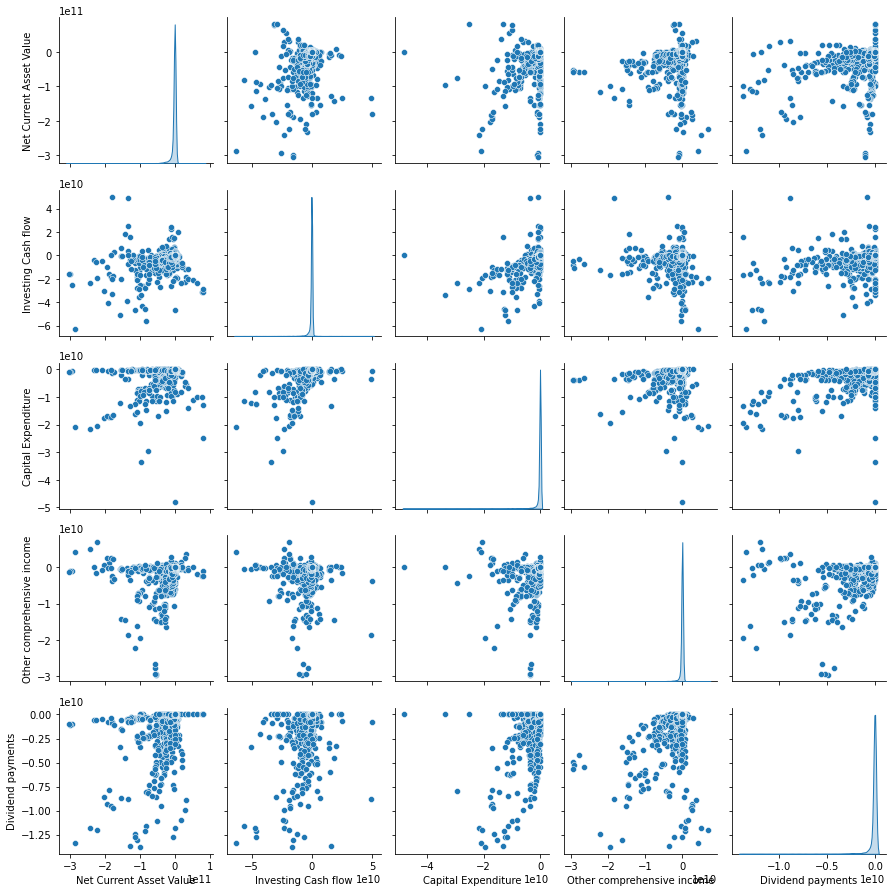

In [138]:
# Plotting with lowest mean

plt.figure(figsize=(20,12))
sns.pairplot(df[bottom_mean],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

[]

<Figure size 1440x864 with 0 Axes>

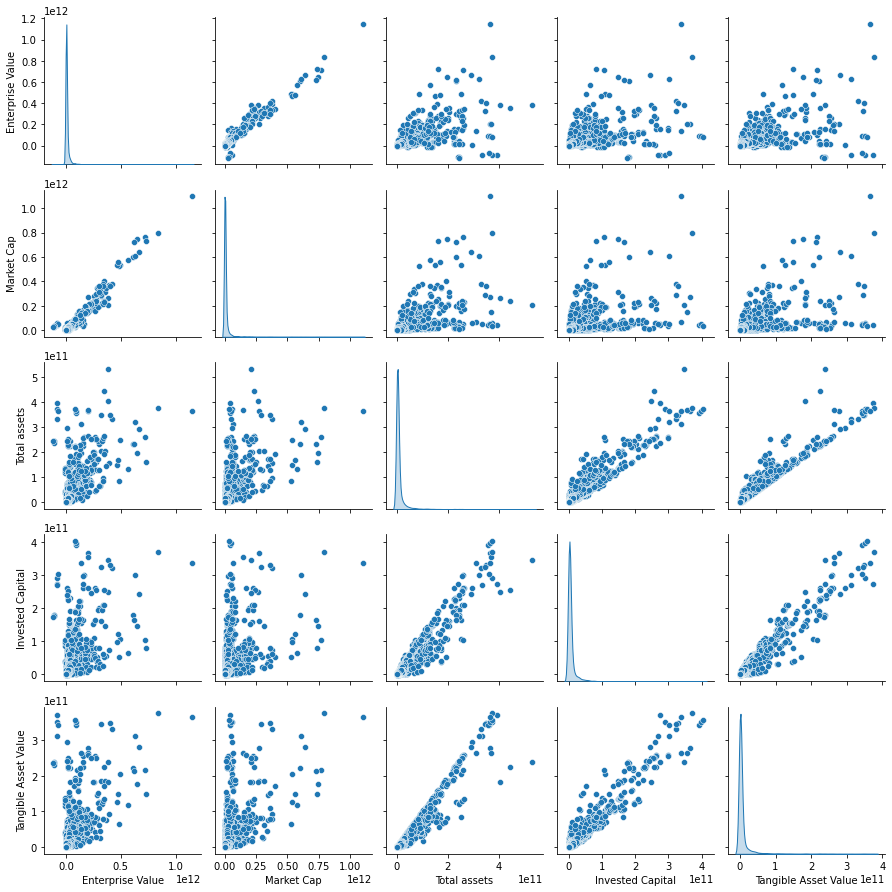

In [139]:
# Plotting cols with highest SD

plt.figure(figsize=(20,12))
sns.pairplot(df[top_std],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

[]

<Figure size 1440x864 with 0 Axes>

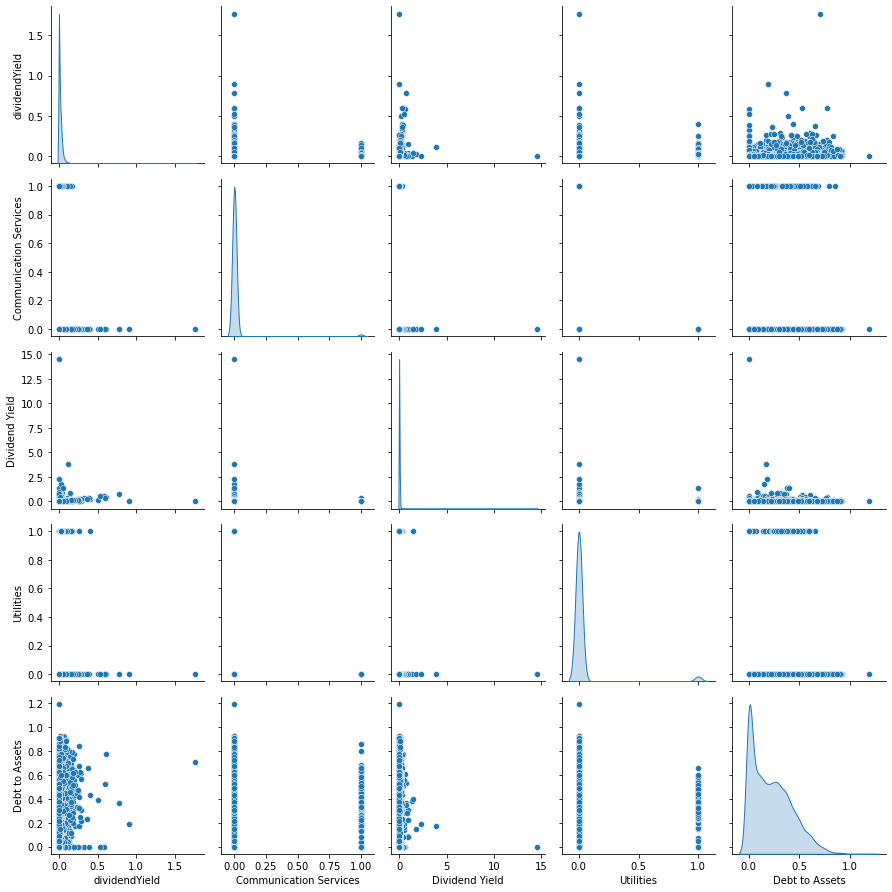

In [140]:
# Plotting cols with lowest SD

plt.figure(figsize=(20,12))
sns.pairplot(df[bottom_std],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

In [141]:
top_mean

['Enterprise Value',
 'Market Cap',
 'Total assets',
 'Invested Capital',
 'Tangible Asset Value']

[]

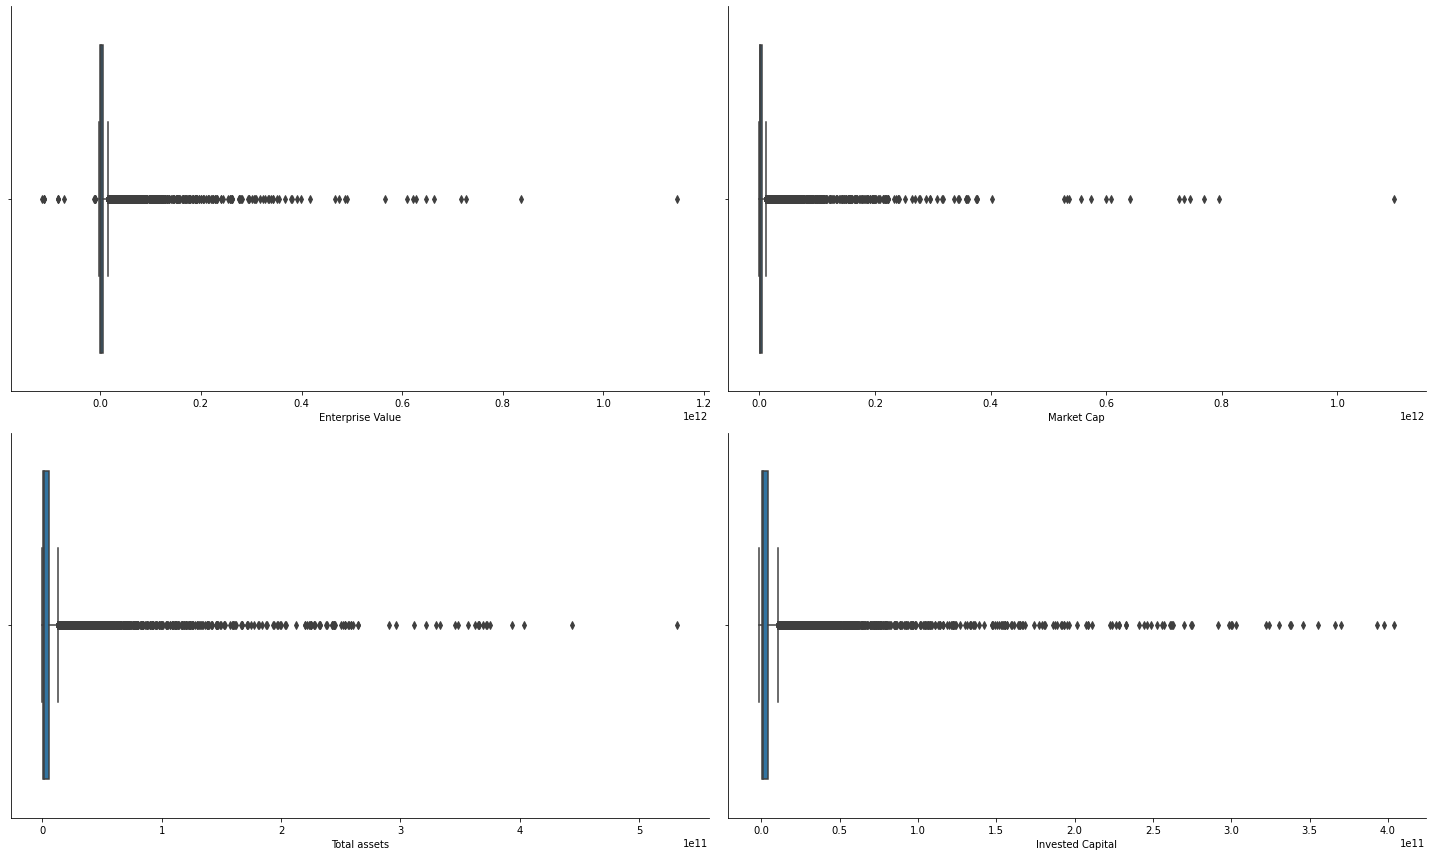

In [142]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[top_mean[0]], data=df, ax=ax0)
sns.boxplot(df[top_mean[1]], data=df, ax=ax1)
sns.boxplot(df[top_mean[2]], data=df, ax=ax2)
sns.boxplot(df[top_mean[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

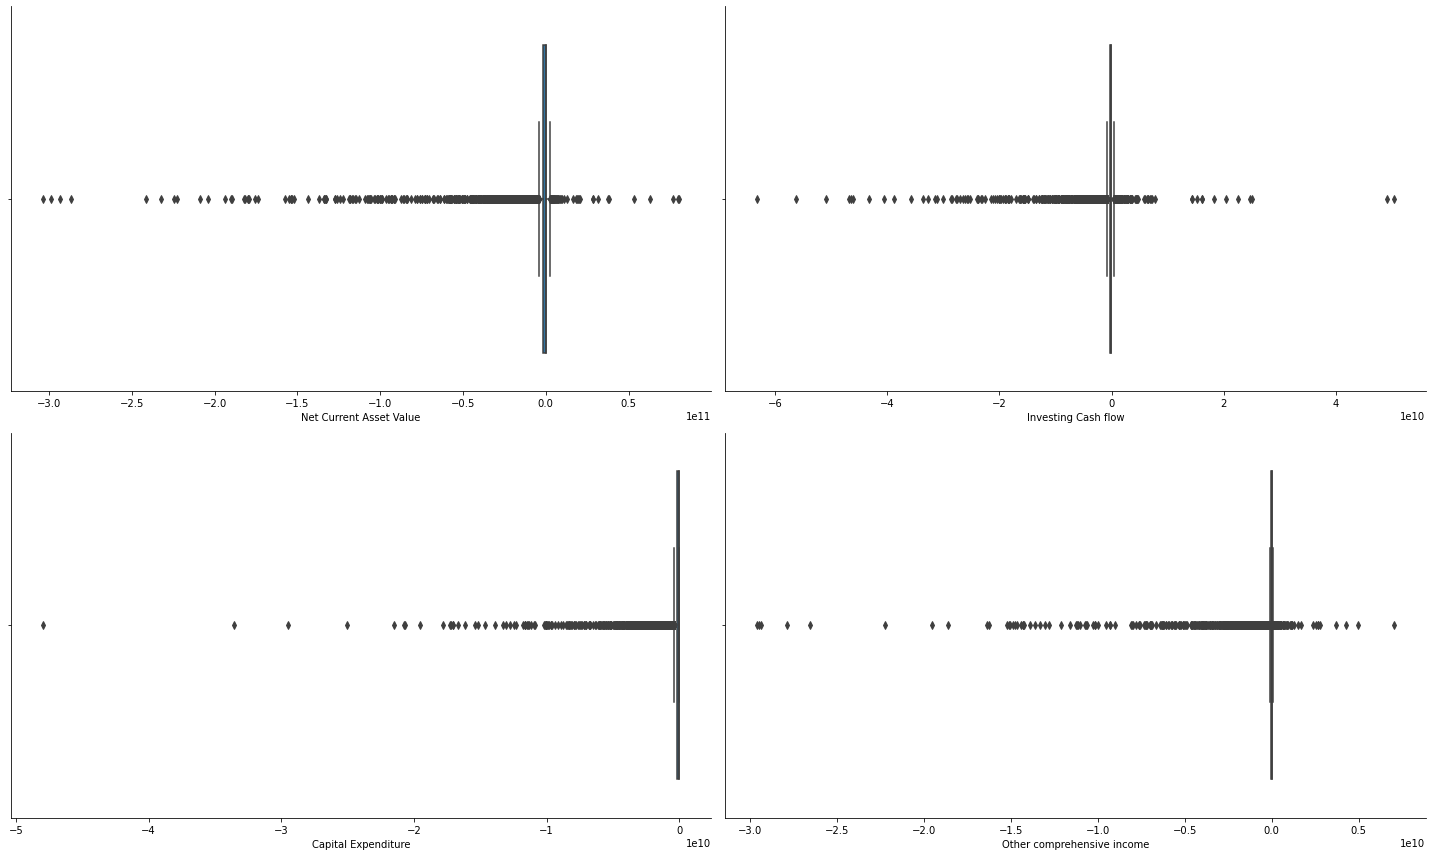

In [143]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[bottom_mean[0]], data=df, ax=ax0)
sns.boxplot(df[bottom_mean[1]], data=df, ax=ax1)
sns.boxplot(df[bottom_mean[2]], data=df, ax=ax2)
sns.boxplot(df[bottom_mean[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

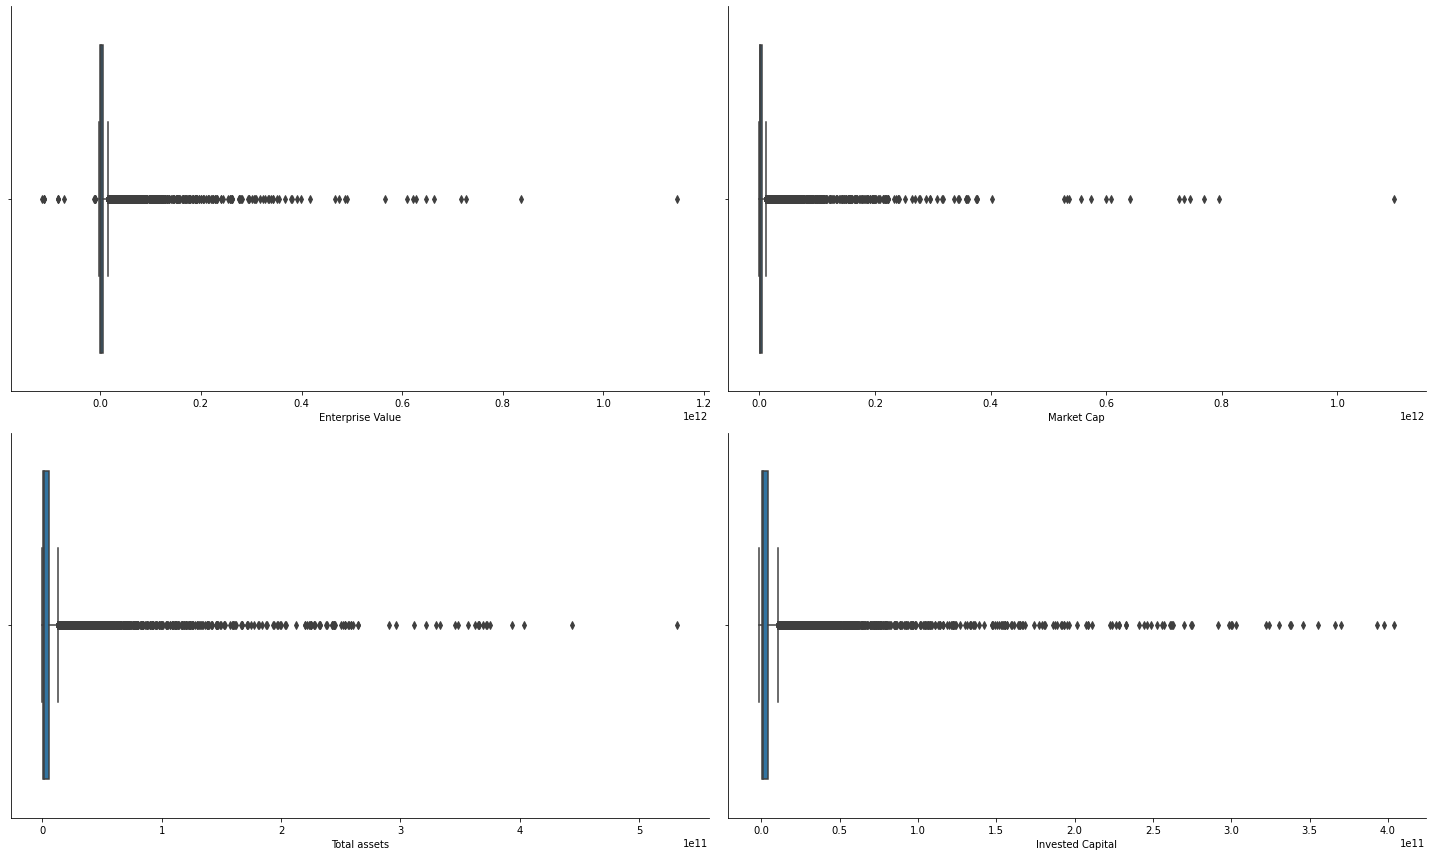

In [144]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[top_std[0]], data=df, ax=ax0)
sns.boxplot(df[top_std[1]], data=df, ax=ax1)
sns.boxplot(df[top_std[2]], data=df, ax=ax2)
sns.boxplot(df[top_std[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

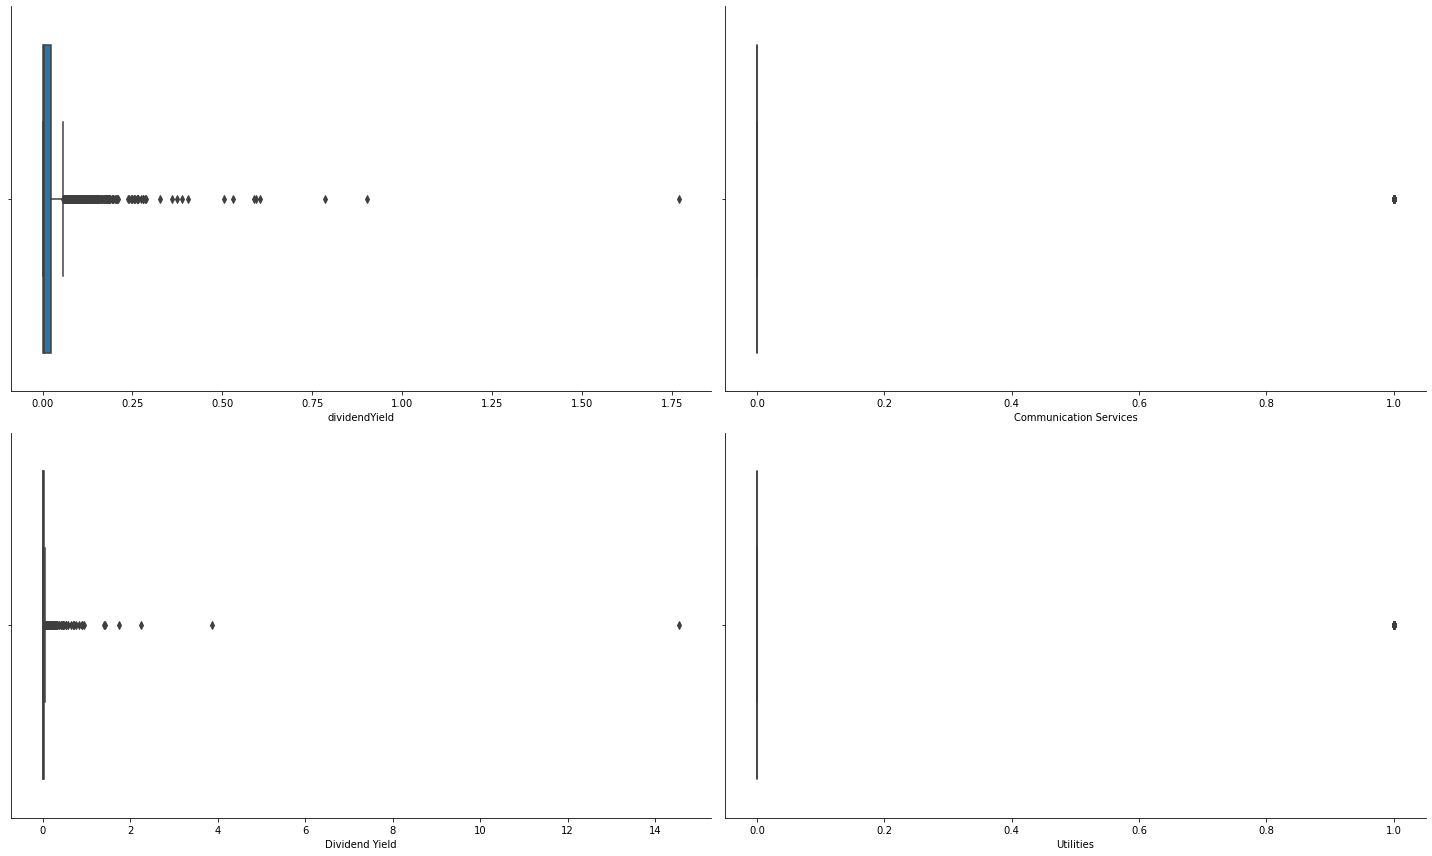

In [145]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[bottom_std[0]], data=df, ax=ax0)
sns.boxplot(df[bottom_std[1]], data=df, ax=ax1)
sns.boxplot(df[bottom_std[2]], data=df, ax=ax2)
sns.boxplot(df[bottom_std[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

In [146]:
df.corr()['Class'].sort_values(ascending=False).head(20)

Class                             1.000000
Utilities                         0.074608
Total assets                      0.062575
Enterprise Value                  0.061636
longtermDebtToCapitalization      0.060150
Total liabilities                 0.059822
Market Cap                        0.057766
Gross Profit                      0.057178
Tangible Asset Value              0.056962
Weighted Average Shs Out (Dil)    0.056545
Weighted Average Shs Out          0.056477
Total debt                        0.054472
Total shareholders equity         0.054470
Operating Cash Flow               0.054185
Intangibles to Total Assets       0.054034
Invested Capital                  0.053928
EBITDA                            0.053900
EBIT                              0.053085
Total current assets              0.052870
Operating Income                  0.052744
Name: Class, dtype: float64

In [147]:
df.corr()['Class'].sort_values(ascending=False).tail(20)

priceSalesRatio                          -0.028651
priceToSalesRatio                        -0.029710
Price to Sales Ratio                     -0.029710
Other comprehensive income               -0.030573
Weighted Average Shares Growth           -0.034007
Stock-based compensation to Revenue      -0.036999
Graham Net-Net                           -0.037054
Issuance (buybacks) of shares            -0.037082
cashRatio                                -0.038009
Asset Growth                             -0.038185
Acquisitions and disposals               -0.040092
Weighted Average Shares Diluted Growth   -0.040276
currentRatio                             -0.041208
Capital Expenditure                      -0.042088
Investing Cash flow                      -0.046782
Net Current Asset Value                  -0.049501
Dividend payments                        -0.051917
SG&A Expenses Growth                     -0.057578
Healthcare                               -0.064619
Energy                         

In [148]:
list(df.corr()['Class'].sort_values(ascending=False).index[1:5])

['Utilities',
 'Total assets',
 'Enterprise Value',
 'longtermDebtToCapitalization']

[]

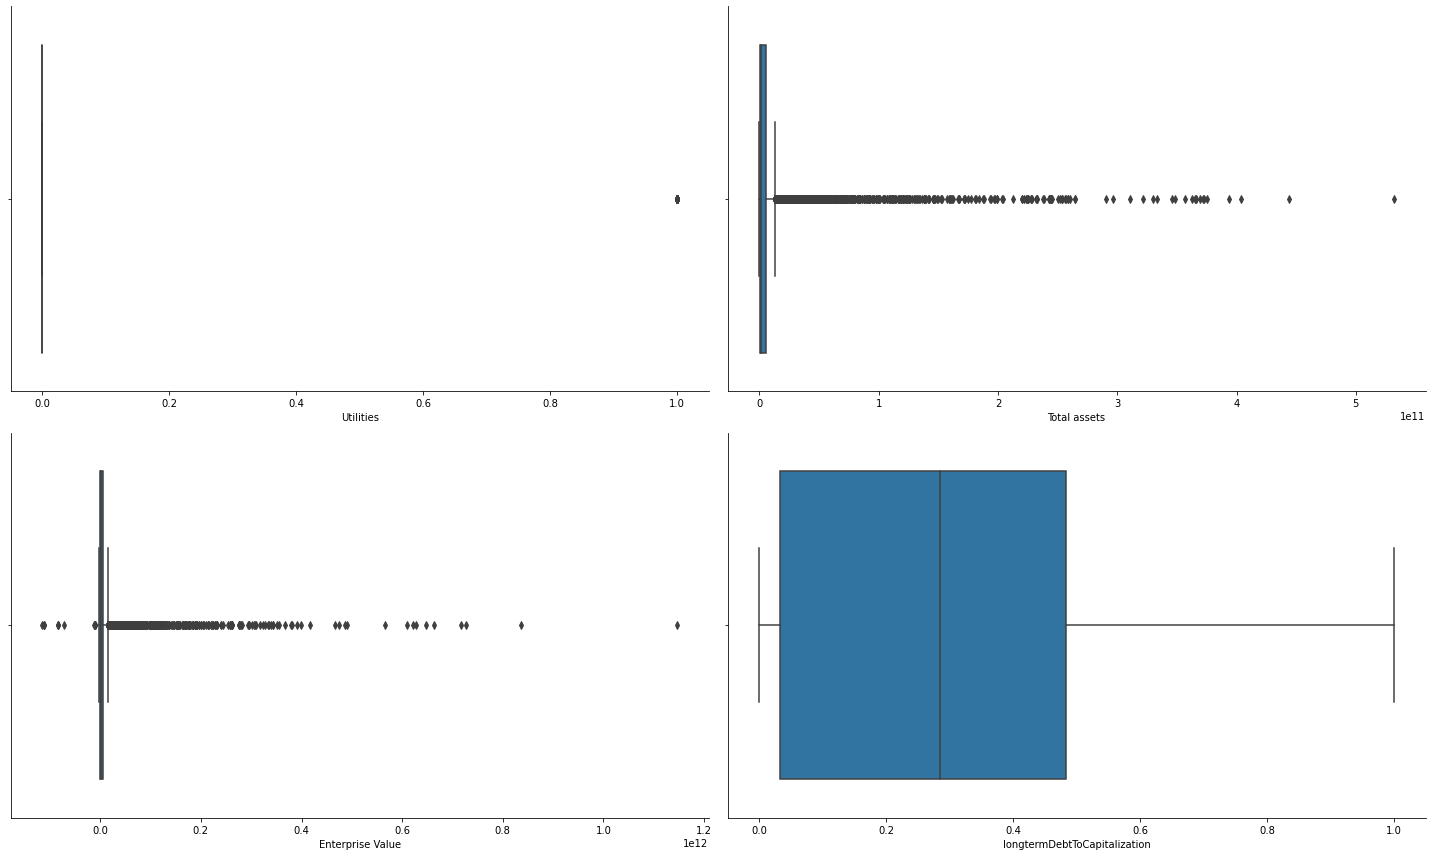

In [149]:
hig_pos_corr = list(df.corr()['Class'].sort_values(ascending=False).index[1:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[hig_pos_corr[0]], hue="Class", data=df, ax=ax0)
sns.boxplot(df[hig_pos_corr[1]], hue="Class", data=df, ax=ax1)
sns.boxplot(df[hig_pos_corr[2]], hue="Class", data=df, ax=ax2)
sns.boxplot(df[hig_pos_corr[3]], hue="Class", data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

In [150]:
hig_neg_corr = list(df.corr()['Class'].sort_values(ascending=True).index[0:7])

In [151]:
hig_neg_corr

['Energy',
 'Healthcare',
 'SG&A Expenses Growth',
 'Dividend payments',
 'Net Current Asset Value',
 'Investing Cash flow',
 'Capital Expenditure']

In [152]:
hig_neg_corr.remove('Energy')

In [153]:
hig_neg_corr.remove('Healthcare')

[]

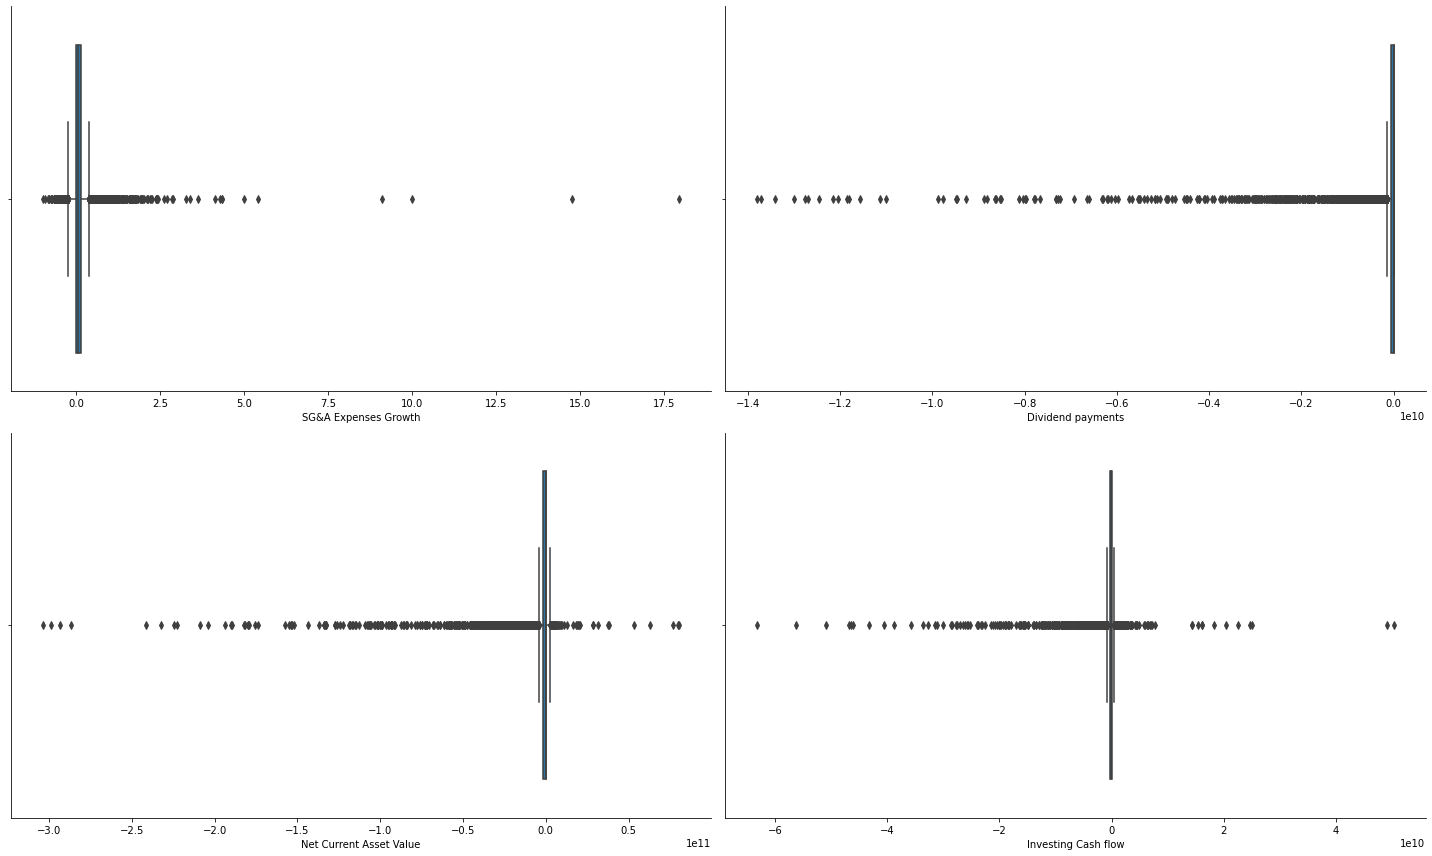

In [154]:
# hig_neg_corr = list(df.corr()['Class'].sort_values(ascending=True).index[0:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[hig_neg_corr[0]], hue="Class", data=df, ax=ax0)
sns.boxplot(df[hig_neg_corr[1]], hue="Class", data=df, ax=ax1)
sns.boxplot(df[hig_neg_corr[2]], hue="Class", data=df, ax=ax2)
sns.boxplot(df[hig_neg_corr[3]], hue="Class", data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

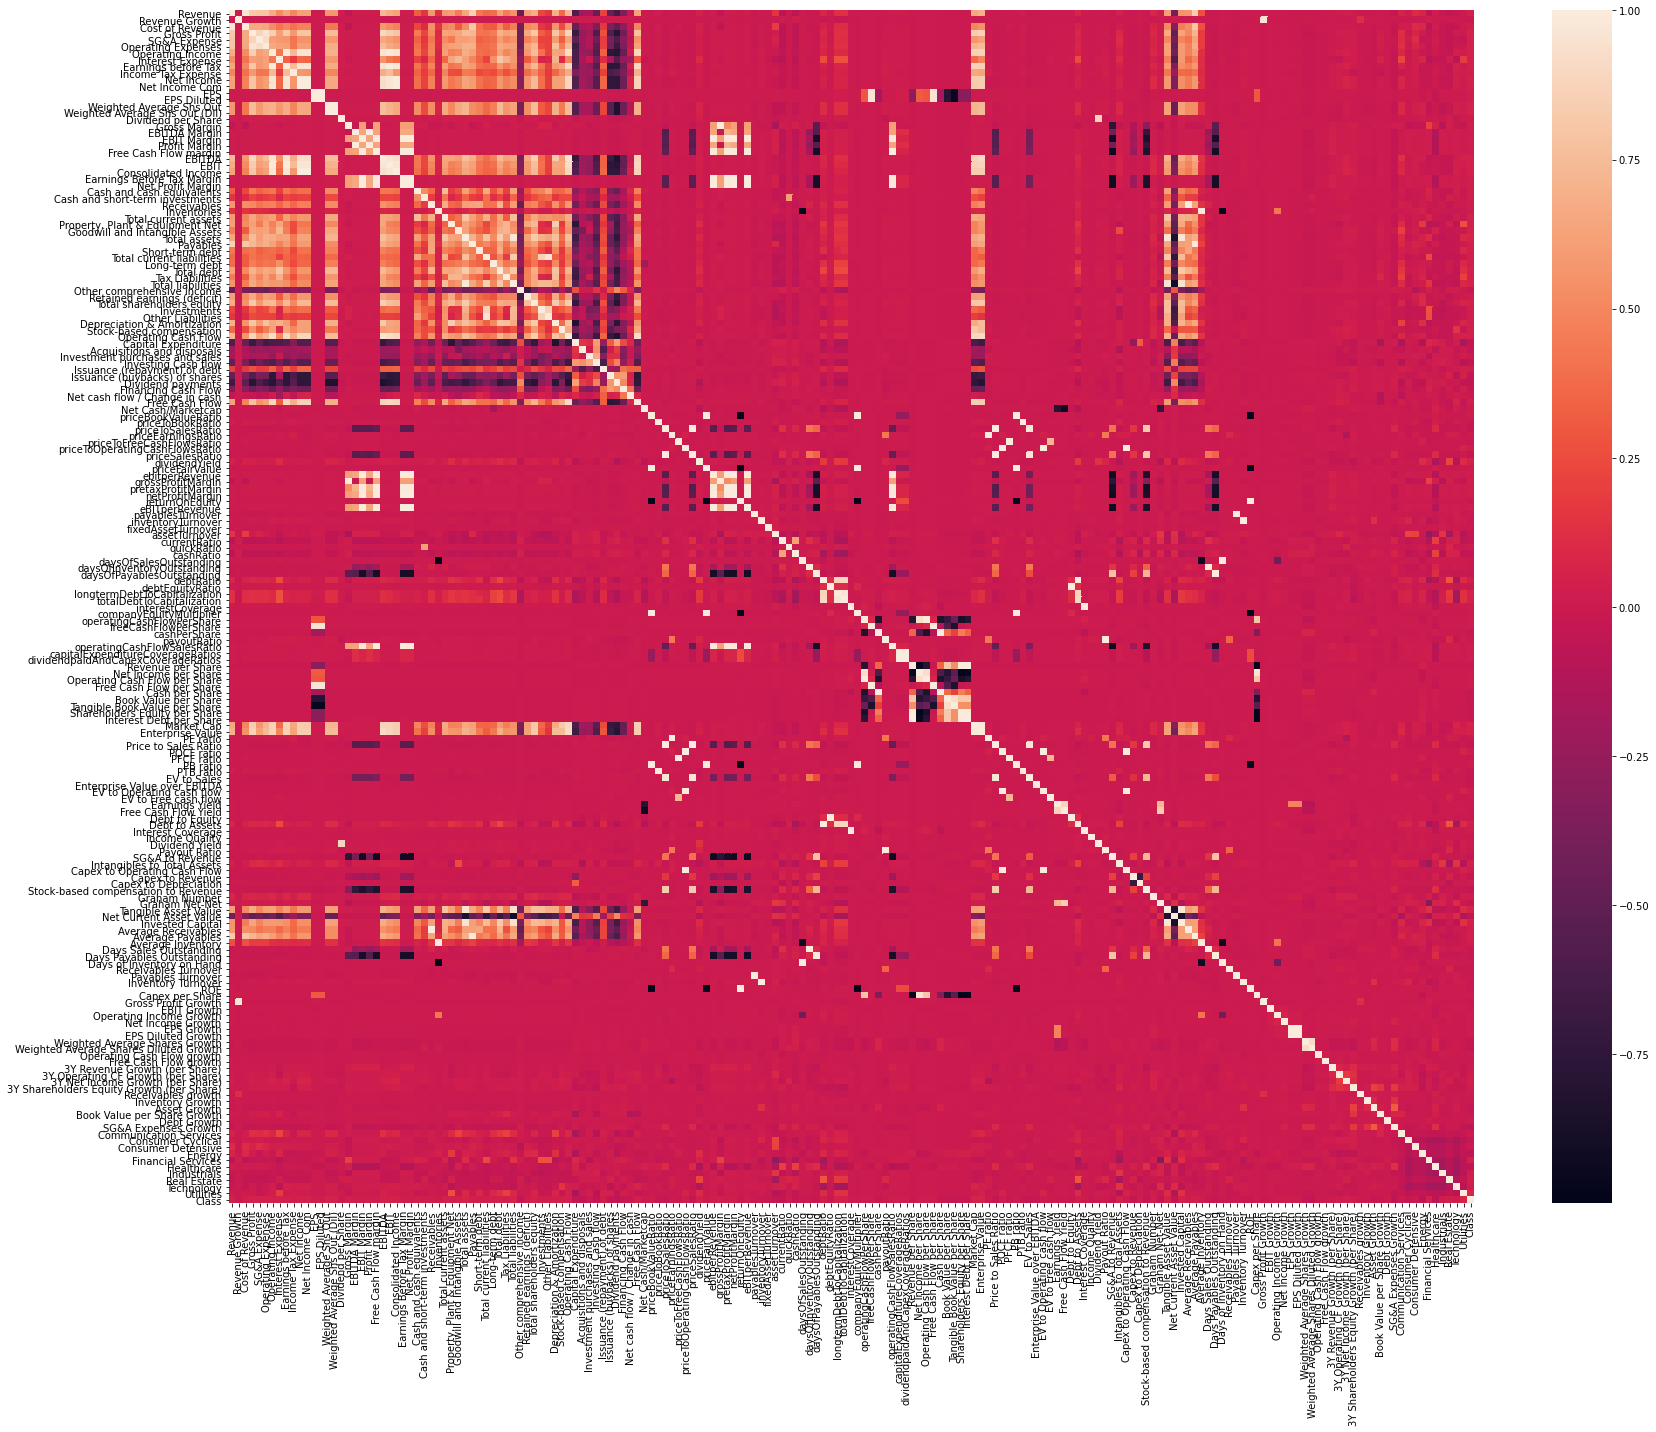

In [155]:
# Plotting the co-relation matrix for the data frame.
plt.figure(figsize = (25, 20))

sns.heatmap(df.corr(),xticklabels=True, yticklabels=True)

# sns.despine()
plt.tight_layout()

plt.show()


In [156]:
sector_list.remove("Basic Materials")

In [157]:
df[sector_list]

,Consumer Defensive,Healthcare,Consumer Cyclical,Industrials,Real Estate,Communication Services,Energy,Financial Services,Utilities,Technology
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0
13,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18678,0,0,0,0,0,0,1,0,0,0
18682,0,0,0,0,0,0,0,1,0,0
18691,0,0,0,0,0,0,0,0,0,1
18693,0,0,0,0,0,0,0,0,0,1


In [158]:
len(sector_list)

10

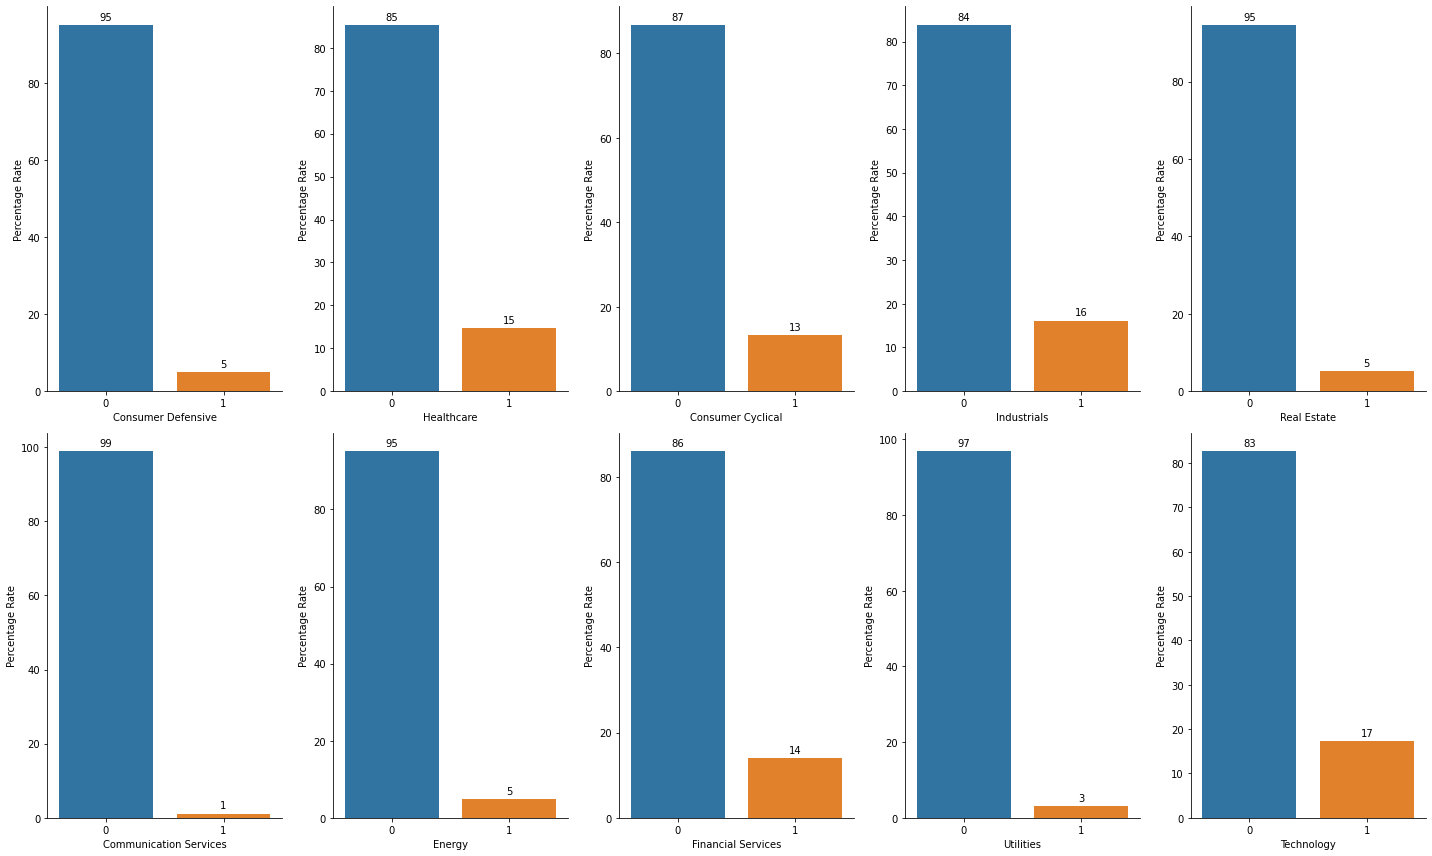

In [159]:
# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate
counter = 1

plt.figure(figsize = (20, 12))
for col_list in sector_list:
        
    series = round(((df[col_list].value_counts())/(len(df[col_list])) * 100), 2)

    plt.subplot(2, 5, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list)
    plt.ylabel('Percentage Rate')


    annotate_graph(ax)

    counter += 1


sns.despine()
plt.tight_layout()
plt.show()



# Winowserize

In [175]:
from scipy.stats.mstats import winsorize

In [297]:
for col in df:
    df[col] = winsorize(df[col], (0.05, 0.05))

[]

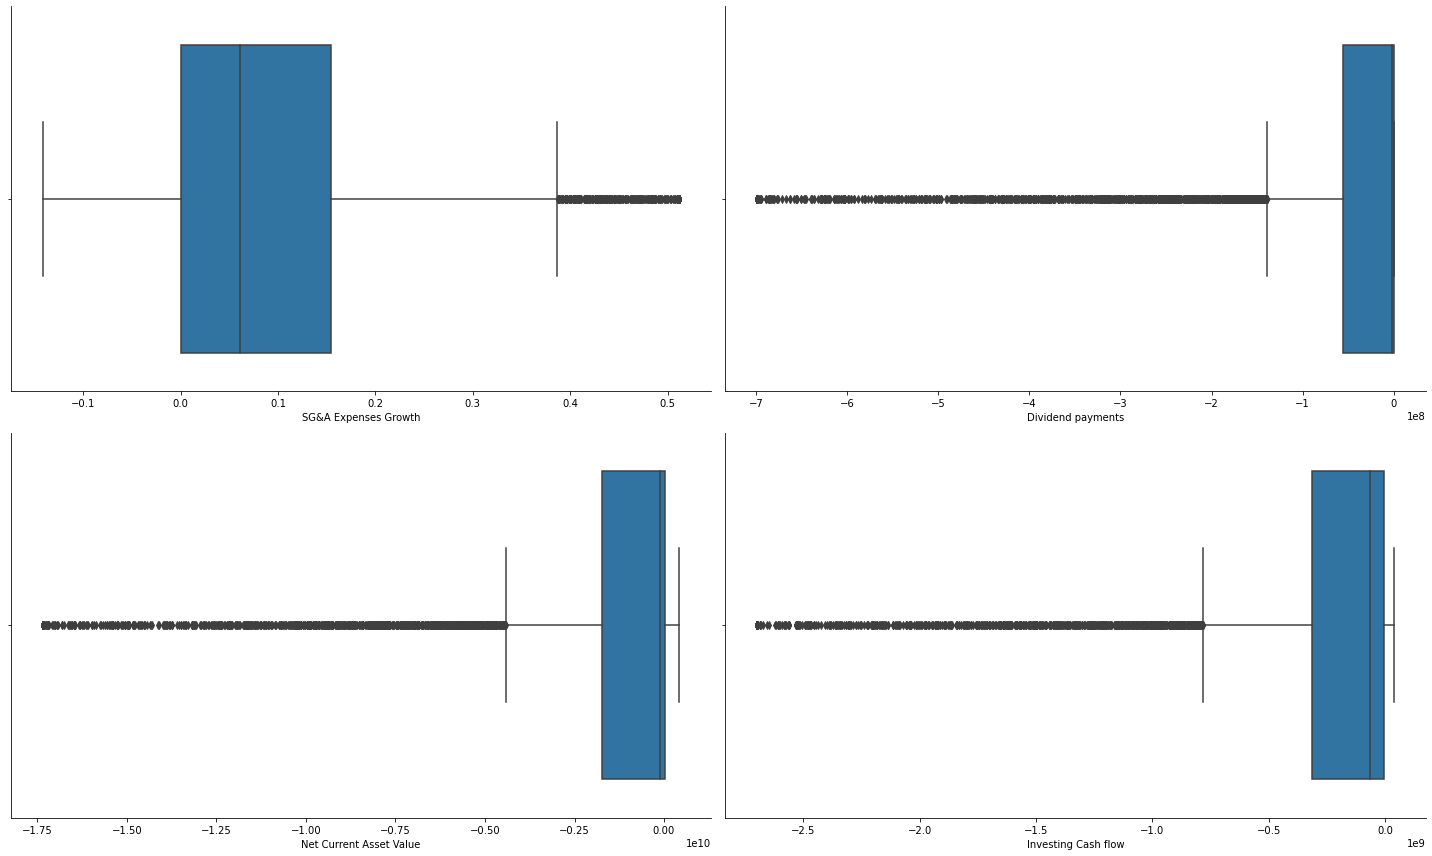

In [298]:
# hig_neg_corr = list(df.corr()['Class'].sort_values(ascending=True).index[0:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[hig_neg_corr[0]], hue="Class", data=df, ax=ax0)
sns.boxplot(df[hig_neg_corr[1]], hue="Class", data=df, ax=ax1)
sns.boxplot(df[hig_neg_corr[2]], hue="Class", data=df, ax=ax2)
sns.boxplot(df[hig_neg_corr[3]], hue="Class", data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

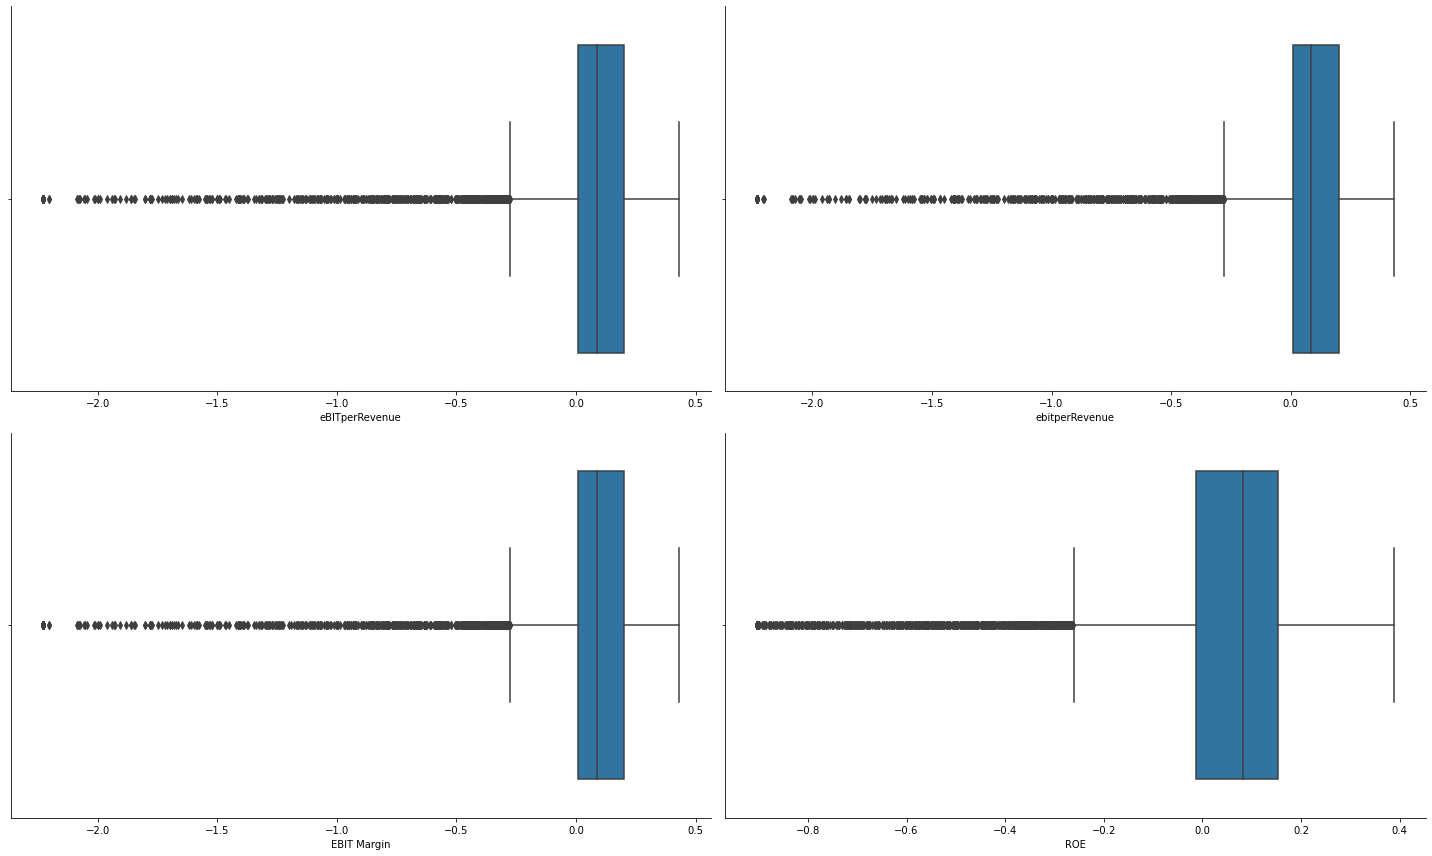

In [299]:
hig_pos_corr = list(df.corr()['Class'].sort_values(ascending=False).index[1:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[hig_pos_corr[0]], hue="Class", data=df, ax=ax0)
sns.boxplot(df[hig_pos_corr[1]], hue="Class", data=df, ax=ax1)
sns.boxplot(df[hig_pos_corr[2]], hue="Class", data=df, ax=ax2)
sns.boxplot(df[hig_pos_corr[3]], hue="Class", data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

# Outlier Treatment

In [300]:
# Droppig Sector Column
df.drop("Sector", axis=1, inplace=True)

KeyError: "['Sector'] not found in axis"

In [301]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Class
3,1.846700e+10,-0.0037,1.107180e+10,6.693000e+09,3.277390e+09,4.561000e+09,2.450000e+09,366734000.0,2.202000e+09,564000000.0,...,0,0,0,0,0,0,0,0,0,1
4,1.846700e+10,0.0273,1.107180e+10,6.693000e+09,3.277390e+09,4.561000e+09,2.450000e+09,366734000.0,2.202000e+09,564000000.0,...,0,0,0,0,0,0,0,0,0,1
11,1.846700e+10,0.1026,1.107180e+10,6.693000e+09,3.277390e+09,4.561000e+09,2.450000e+09,366734000.0,2.202000e+09,564000000.0,...,0,0,0,0,0,0,0,0,0,0
12,1.846700e+10,0.0126,1.107180e+10,6.693000e+09,3.277390e+09,4.561000e+09,2.450000e+09,366734000.0,2.202000e+09,564000000.0,...,0,0,0,0,0,0,0,0,0,0
13,1.846700e+10,0.0501,1.107180e+10,6.693000e+09,3.277390e+09,4.561000e+09,2.450000e+09,366734000.0,2.202000e+09,564000000.0,...,0,0,0,0,0,0,0,0,0,0


## Method 1 Standard Deviation Method

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

In [302]:
# Extracting numerical columns from the telecom_df data frame.
numerical_cols = df.select_dtypes(include = np.number).columns.to_list()

In [303]:
# calculate summary statistics
data = df[numerical_cols]
data_mean, data_std = np.mean(data), np.std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = df[((df < lower) | (df > upper)).any(axis=1)]
print('Number of identified outliers: %d' % len(outliers))

Number of identified outliers: 5920


In [304]:
# remove outliers
outliers_removed = df[~((df < lower) | (df > upper)).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 3438


## Method 2 IQR method

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5.

In [305]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Revenue            2.627103e+09
Revenue Growth     1.716000e-01
Cost of Revenue    1.441256e+09
Gross Profit       9.494335e+08
SG&A Expense       4.061052e+08
                       ...     
Industrials        0.000000e+00
Real Estate        0.000000e+00
Technology         0.000000e+00
Utilities          0.000000e+00
Class              1.000000e+00
Length: 181, dtype: float64


In [306]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 12


## Method 3:  99-1 percentile method

In [307]:
Q1 = df.quantile(0.01)
Q3 = df.quantile(0.99)
IQR = Q3 - Q1
print(IQR)

Revenue            1.845691e+10
Revenue Growth     8.675000e-01
Cost of Revenue    1.107180e+10
Gross Profit       6.689038e+09
SG&A Expense       3.272251e+09
                       ...     
Industrials        1.000000e+00
Real Estate        1.000000e+00
Technology         1.000000e+00
Utilities          0.000000e+00
Class              1.000000e+00
Length: 181, dtype: float64


In [308]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 9358


In [309]:
### We choose 99-1 percentile method for outlier treatment
df_99_1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [310]:
df_99_1.shape

(9358, 181)

## Method 4:  95-5 percentile method

In [311]:
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1

In [312]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 9358


In [313]:
### We choose 95-5 percentile method for outlier treatment
df_95_5 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [314]:
df_95_5.shape

(9358, 181)

In [315]:
df = df_99_1

## Train Test Split

In [316]:
my_cv = 2

In [317]:
from sklearn.preprocessing import MinMaxScaler #  --> 12
from sklearn.preprocessing import RobustScaler #  ---> 3

from sklearn.preprocessing import MaxAbsScaler # -----> 14
from sklearn.preprocessing import StandardScaler # ----> 69

from sklearn.preprocessing import Normalizer # --------> 13
from sklearn.preprocessing import QuantileTransformer # ----> 53
from sklearn.preprocessing import PowerTransformer # ----> 72

In [318]:
X = df.drop('Class', axis = 1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7486, 180)
(7486, 1)
(1872, 180)
(1872, 1)


In [319]:
(y_train==1).sum()[0]

4447

In [320]:
print("Counts of label '1': {}".format((y_train==1).sum()[0]))
print("Counts of label '0': {} \n".format((y_train==0).sum()[0]))

y_train_1 = (y_train==1).sum()[0]
print("Percentage of Profitable Company : {}% \n".format(round(y_train_1/len(y_train)*100,2)))

Counts of label '1': 4447
Counts of label '0': 3039 

Percentage of Profitable Company : 59.4% 



# Scalers

## Robust Scaler

In [321]:
# Robust Scaler uses Scale features using statistics that are robust to outliers
rb = RobustScaler()

X_train = rb.fit_transform(X_train)
X_test = rb.transform(X_test)


In [322]:
df.shape

(9358, 181)

In [323]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [324]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

In [325]:
pca_again = PCA(0.95)

In [326]:
X_train_pca_rb = pca_again.fit_transform(X_train)

In [327]:
X_train_pca_rb.shape

(7486, 37)

In [328]:
# Tranforming X_Test
X_test_pca_rb = pca_again.transform(X_test)
X_test_pca_rb.shape

(1872, 37)

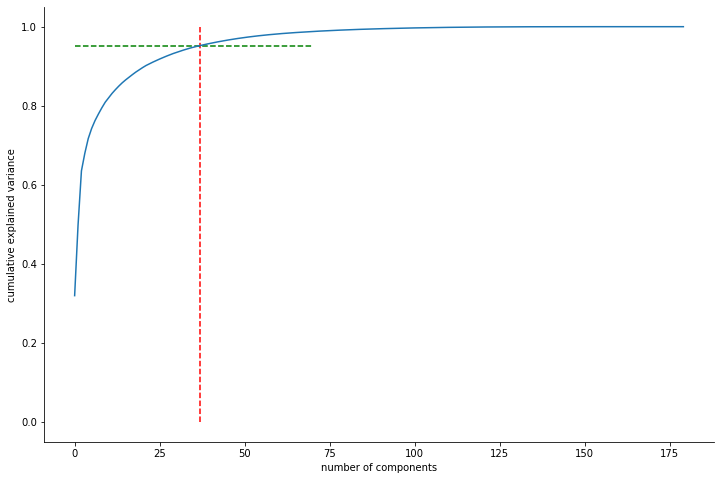

In [329]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.vlines(x = X_train_pca_rb.shape[1],ymax = 1,ymin = 0,colors = 'r',linestyles = '--')
plt.hlines(y = 0.95, xmax = 70,xmin = 0,colors = 'g',linestyles = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

sns.despine()
plt.show()

## Normalizer

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

In [331]:
nz = Normalizer()
X_train=nz.fit_transform(X_train)
X_test = nz.transform(X_test)

In [332]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

In [333]:
X_train_pca_nz = pca_again.fit_transform(X_train)

In [334]:
X_train_pca_nz.shape

(7486, 12)

In [335]:
# Tranforming X_Test
X_test_pca_nz = pca_again.transform(X_test)
X_test_pca_nz.shape

(1872, 12)

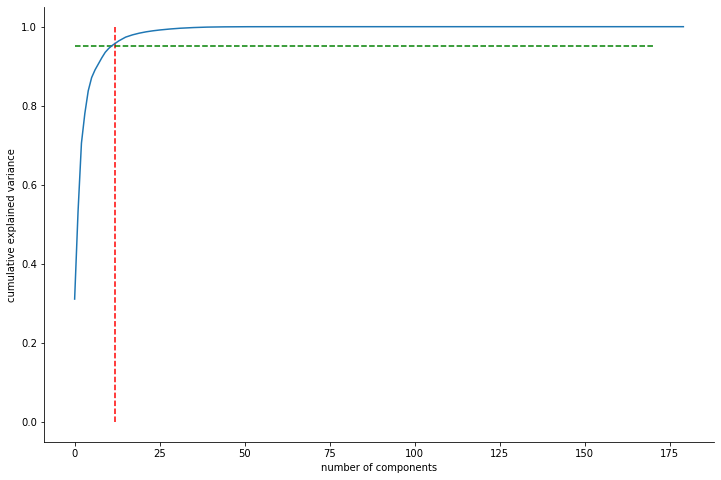

In [336]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.vlines(x = X_train_pca_nz.shape[1],ymax = 1,ymin = 0,colors = 'r',linestyles = '--')
plt.hlines(y = 0.95, xmax = 170,xmin = 0,colors = 'g',linestyles = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

sns.despine()
plt.show()

## Power Transformation

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

In [338]:
pt = PowerTransformer()

X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)


In [339]:
df.shape

(9358, 181)

In [340]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

In [341]:
X_train_pca_pt = pca_again.fit_transform(X_train)

In [342]:
X_train_pca_pt.shape

(7486, 57)

In [343]:
# Tranforming X_Test
X_test_pca_pt = pca_again.transform(X_test)
X_test_pca_pt.shape

(1872, 57)

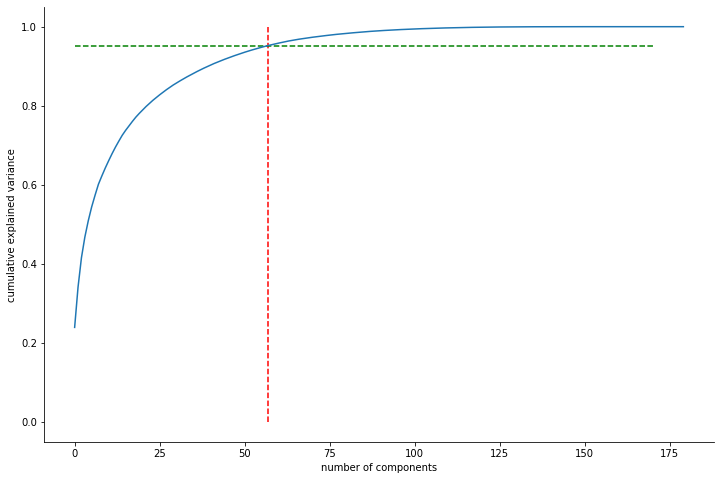

In [344]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.vlines(x = X_train_pca_pt.shape[1],ymax = 1,ymin = 0,colors = 'r',linestyles = '--')
plt.hlines(y = 0.95, xmax = 170,xmin = 0,colors = 'g',linestyles = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

sns.despine()
plt.show()

## QuantileTransformer

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [346]:
qt = QuantileTransformer()
X_train=qt.fit_transform(X_train)
X_test = qt.transform(X_test)

In [347]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

In [348]:
X_train_pca_qt = pca_again.fit_transform(X_train)

In [349]:
X_train_pca_qt.shape

(7486, 52)

In [350]:
# Tranforming X_Test
X_test_pca_qt = pca_again.transform(X_test)
X_test_pca_qt.shape

(1872, 52)

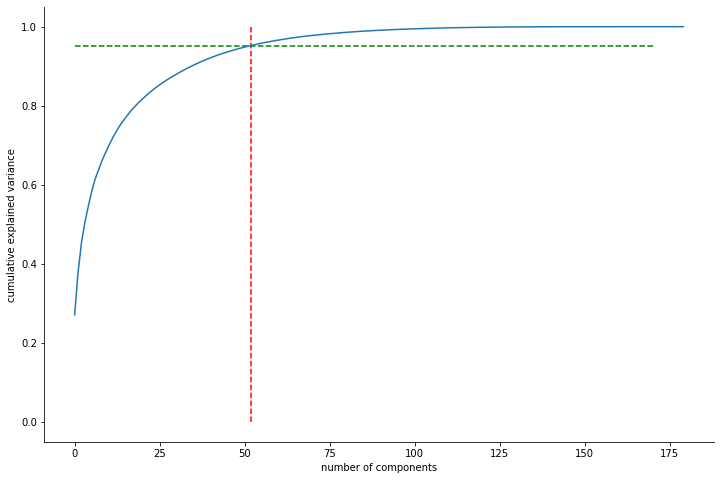

In [351]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.vlines(x = X_train_pca_qt.shape[1],ymax = 1,ymin = 0,colors = 'r',linestyles = '--')
plt.hlines(y = 0.95, xmax = 170,xmin = 0,colors = 'g',linestyles = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

sns.despine()
plt.show()

## MinMax Scaler

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

In [353]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [354]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

In [355]:
X_train_pca_mm = pca_again.fit_transform(X_train)

In [356]:
X_train_pca_mm.shape

(7486, 62)

In [357]:
# Tranforming X_Test
X_test_pca_mm = pca_again.transform(X_test)
X_test_pca_mm.shape

(1872, 62)

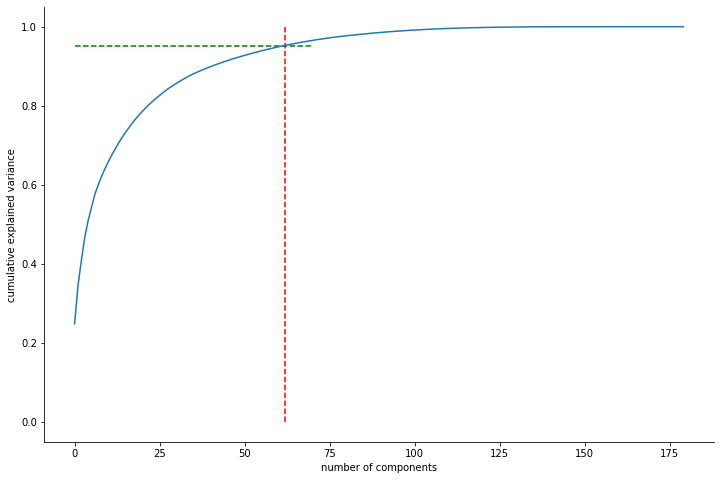

In [358]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.vlines(x = X_train_pca_mm.shape[1],ymax = 1,ymin = 0,colors = 'r',linestyles = '--')
plt.hlines(y = 0.95, xmax = 70,xmin = 0,colors = 'g',linestyles = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

sns.despine()
plt.show()

## MaxAbsScaler

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

In [360]:
mx = MaxAbsScaler()

X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)


In [361]:
df.shape

(9358, 181)

In [362]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

In [363]:
X_train_pca_mx = pca_again.fit_transform(X_train)

In [364]:
X_train_pca_mx.shape

(7486, 61)

In [365]:
# Tranforming X_Test
X_test_pca_mx = pca_again.transform(X_test)
X_test_pca_mx.shape

(1872, 61)

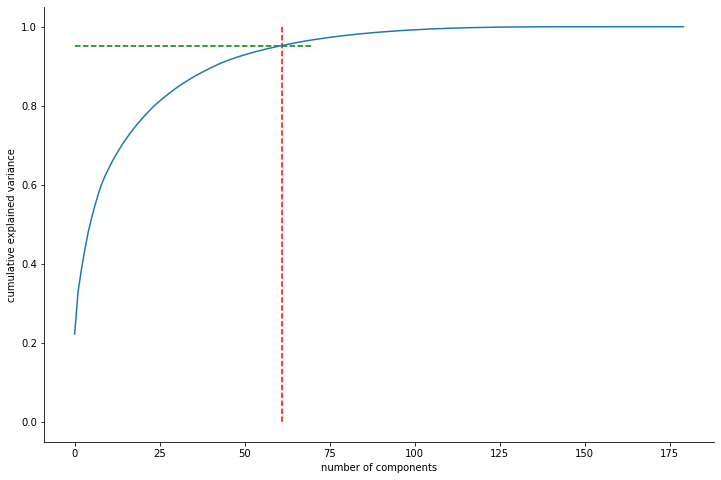

In [366]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.vlines(x = X_train_pca_mx.shape[1],ymax = 1,ymin = 0,colors = 'r',linestyles = '--')
plt.hlines(y = 0.95, xmax = 70,xmin = 0,colors = 'g',linestyles = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

sns.despine()
plt.show()

## StandardScaler

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

In [368]:
sd= StandardScaler()

X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)


In [369]:
df.shape

(9358, 181)

In [370]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

In [371]:
X_train_pca_std = pca_again.fit_transform(X_train)

In [372]:
X_train_pca_std.shape

(7486, 63)

In [373]:
# Tranforming X_Test
X_test_pca_std = pca_again.transform(X_test)
X_test_pca_std.shape

(1872, 63)

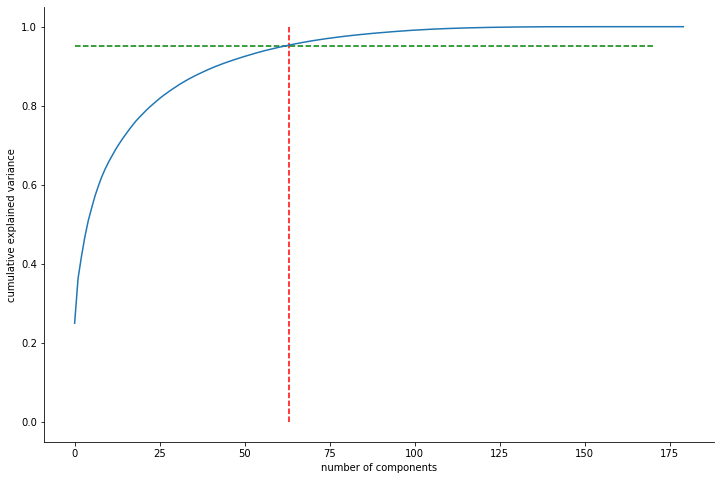

In [374]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.vlines(x = X_train_pca_std.shape[1],ymax = 1,ymin = 0,colors = 'r',linestyles = '--')
plt.hlines(y = 0.95, xmax = 170,xmin = 0,colors = 'g',linestyles = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

sns.despine()
plt.show()

# Defining functions for Modelling

In [375]:
# Defining the function to plot the ROC Curve

def draw_roc (actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)"%auc_score)
    
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating charactersitc example")
    plt.legend(loc="lower right")
    sns.despine()
    plt.tight_layout()
    plt.show()
    
    return fpr, tpr, thresholds

In [376]:
metricsdataframe=pd.DataFrame(columns=['Model',
                                       'Train/Test',
                                       'Roc_auc_score',
                                       'Sensitivity',
                                       'Specificity',
                                      'FPR',
                                      'Positive predictive value',
                                      'Negative Predictive value',
                                      'Precision',
                                      'Accuracy',
                                      'F1-Score'])

In [377]:
# Defining function to get the evaluation metrics of the models.
def getModelMetrics(actual_Class=False,pred_Class=False,model_name='',train_or_test=''):

    confusion = metrics.confusion_matrix(actual_Class, pred_Class)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    

    
    Roc_auc_score=round(metrics.roc_auc_score(actual_Class,pred_Class),2)
    # Let's see the sensitivity of our logistic regression model
    Sensitivity=round((TP / float(TP+FN)),2)
    # Let us calculate specificity
    Specificity=round((TN / float(TN+FP)),2)
    # Calculate false postive rate - predicting profit when customer does not have profitted
    FPR=round((FP/ float(TN+FP)),2)
    # positive predictive value 
    PositivePredictiveValue=round((TP / float(TP+FP)),2)
    # Negative predictive value
    NegativePredictiveValue=round((TN / float(TN+ FN)),2)
    # sklearn precision score value 
    Precision=round(metrics.precision_score(actual_Class, pred_Class ),2)
    # Accuracy
    Accuracy = round(metrics.accuracy_score(actual_Class, pred_Class), 2)
    # F-1 Score
    F1_Score = round(metrics.f1_score(actual_Class, pred_Class), 2)
    
    
    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_Class,pred_Class)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting profit when customer does not have profitted
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('Precision: {}'.format(metrics.precision_score(actual_Class, pred_Class )))
    # sklearn precision score value 
    print('Accuracy: {}'.format(metrics.accuracy_score(actual_Class, pred_Class )))
    #F1 Score
    print("F1 Score: {}".format(metrics.f1_score(actual_Class, pred_Class )))
    
#     data_list=[model_name,train_or_test,Roc_auc_score,Sensitivity,Specificity,NegativePredictiveValue,Precision, ]
    data_list=[model_name,train_or_test,Roc_auc_score,Sensitivity,Specificity,FPR,PositivePredictiveValue,NegativePredictiveValue,Precision, Accuracy, F1_Score]
    series_metrics=pd.Series(data_list,index=metricsdataframe.columns)
    
    return series_metrics
    

In [378]:
# Defining function to write the evaluation metrics of the models into data frame.
def WriteModelMetrics(series_metrics,metricsdataframe):
    metricsdataframe = metricsdataframe.append(series_metrics,ignore_index=True)
    return metricsdataframe

In [379]:
# Function to find the optimal cutoff for classifing as Profit/non-profit
def findOptimalCutoff(df):
    
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.Class_Prob.map( lambda x: 1 if x > i else 0)
        
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

    for i in num:
        cm1 = metrics.confusion_matrix(df.Class, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.figure(figsize=(7,5))
    plt.tight_layout()
    sns.despine()
    plt.show()

In [380]:
# Calculating VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Defining a function to give VIF value 
def vif_cal(X):     
    vif = pd.DataFrame() 
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]    
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


In [381]:
# This method will result in the calculation of predicted value of the Class column.
def predictClassWithProb(model,X,y,prob,model_name='',train_or_test=''):
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'Class':y.Class, 'Class_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Class_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.Class_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    series_metrics=getModelMetrics(y_df.Class,y_df.final_predicted,model_name,train_or_test)
    return y_df,series_metrics

In [382]:
# This method will perform cross-validation and the display the model report.
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=my_cv):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.3g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.3g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.3g | Std - %.3g | Min - %.3g | Max - %.3g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

In [383]:
# This method will plot accuracy of the model with the max_depth of decision tree.
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("accuracy")
    plt.legend()
    plt.show()

In [384]:
# This method will plot accuracy of the random forest model.
def random_forst_feature_graph(grid_search, param):
    scores = grid_search.cv_results_
    plt.figure(figsize=(8,8))
    
    param = "param_"+param
    plt.plot(scores[param], 
             scores["mean_train_score"], 
             label="Training accuracy")

    plt.plot(scores[param], 
             scores["mean_test_score"], 
             label="Test accuracy")

    plt.xlabel(param)
    plt.ylabel("F1")
    plt.legend()

    plt.tight_layout()
    sns.despine()
    plt.show()

# Modelling

In [385]:
X_train = X_train_pca_std
X_test = X_test_pca_std


In [386]:
X_train_pca = X_train
y_train_res = y_train
X_test_pca = X_test
# y_test = y_test

y_train_res=y_train_res.values.reshape(-1,1)
# y_test = y_test.values.reshape(-1,1)

In [387]:
X_train_pca.shape

(7486, 63)

In [388]:
y_train_res.shape

(7486, 1)

In [389]:
X_test_pca.shape

(1872, 63)

In [390]:
y_test.shape

(1872, 1)

In [391]:
y_train_res = pd.DataFrame(y_train_res)

In [392]:
y_train_res.rename(columns={0:"Class"}, inplace=True)

In [393]:
y_train_res

,Class
0,1
1,1
2,1
3,1
4,0
...,...
7481,1
7482,1
7483,1
7484,1


In [394]:
y_test 

,Class
9067,0
14052,1
16135,0
3838,1
6031,0
...,...
33,1
1774,1
13046,0
2379,0


# 1. Logistic Regression

In [395]:
# Creating Train-Test variables for Logistic Regression
X_train_lr = pd.DataFrame(X_train_pca)
y_train_lr = pd.DataFrame(y_train_res)
X_test_lr = pd.DataFrame(X_test_pca)
y_test_lr = y_test

In [396]:
y_train_lr.rename(columns={0:"Class"}, inplace=True)

In [397]:
y_train_lr

,Class
0,1
1,1
2,1
3,1
4,0
...,...
7481,1
7482,1
7483,1
7484,1


In [398]:
X_train_lr.shape

(7486, 63)

## Feature Elimination 

In [399]:
logml = sm.GLM(y_train_lr, (sm.add_constant(X_train_lr)), family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                 7486
Model:                            GLM   Df Residuals:                     7422
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4812.6
Date:                Fri, 15 Oct 2021   Deviance:                       9625.2
Time:                        07:58:19   Pearson chi2:                 7.50e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4021      0.024     16.445      0.000       0.354       0.450
0              0.0493      0.004     12.667      0.000       0.042       0.057
1             -0.0434      0.006     -7.785      0.000      -0.054      -0.032
2             -0.0040      0.008     -0.505      0.614      -0.019       0.011
3              0.0300      0.008      3.623      0.000       0.014       0.046
4              0.0179      0.009      1.966      0.049    5.68e-05       0.036
5             -0.0406      0.010     -3.919      0.000      -0.061      -0.020
6             -0.0106      0.011     -0.998      0.318      -0.031       0.010
7              0.0534      0.011      4.655      0.000       0.031       0.076
8             -0.0323      0.012     -2.668      0.008      -0.056      -0.009
9             -0.0136      0.013     -1.038      0.299      -0.039       0.012
10            -0.0262      0.014     -1.887      0.059      -0.053       0.001
11            -0.0457      0.015     -3.111      0.002      -0.075      -0.017
12            -0.0133      0.015     -0.898      0.369      -0.042       0.016
13            -0.0262      0.016     -1.660      0.097      -0.057       0.005
14            -0.0399      0.016     -2.466      0.014      -0.072      -0.008
15             0.0088      0.017      0.524      0.600      -0.024       0.042
16             0.0139      0.017      0.819      0.413      -0.019       0.047
17            -0.0082      0.017     -0.467      0.641      -0.042       0.026
18             0.0323      0.018      1.795      0.073      -0.003       0.068
19            -0.0580      0.019     -3.074      0.002      -0.095      -0.021
20             0.0063      0.020      0.324      0.746      -0.032       0.045
21             0.0121      0.020      0.602      0.547      -0.027       0.051
22             0.0092      0.020      0.455      0.649      -0.030       0.049
23             0.0084      0.021      0.389      0.697      -0.034       0.050
24            -0.1163      0.022     -5.378      0.000      -0.159      -0.074
25             0.0186      0.022      0.858      0.391      -0.024       0.061
26            -0.0714      0.023     -3.173      0.002      -0.116      -0.027
27            -0.0353      0.023     -1.524      0.128      -0.081       0.010
28            -0.0040      0.024     -0.169      0.866      -0.050       0.042
29            -0.0046      0.024     -0.190      0.850      -0.052       0.043
30            -0.0206      0.024     -0.847      0.397      -0.068       0.027
31             0.0196      0.025      0.797      0.425      -0.029       0.068
32             0.1030      0.026      3.943      0.000       0.052       0.154
33            -0.0092      0.026     -0.351      0.726      -0.061       0.042
34             0.0152      0.027      0.569      0.570      -0.037       0.068
35

In [400]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=int(X_train_lr.shape[1]*0.8))
rfe.fit(X_train_lr, y_train_lr)

RFE(estimator=LogisticRegression(), n_features_to_select=50)

In [401]:
top = X_train_lr.columns[rfe.support_]

In [402]:
top

Int64Index([ 0,  1,  3,  4,  5,  7,  8,  9, 10, 11, 13, 14, 16, 18, 19, 24, 25,
            26, 27, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
            46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62],
           dtype='int64')

In [403]:
X_train_lr = X_train_lr[top]
X_test_lr = X_test_lr[top]

In [404]:
logml = sm.GLM(y_train_lr, (sm.add_constant(X_train_lr)), family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                 7486
Model:                            GLM   Df Residuals:                     7435
Model Family:                Binomial   Df Model:                           50
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4814.4
Date:                Fri, 15 Oct 2021   Deviance:                       9628.8
Time:                        07:58:19   Pearson chi2:                 7.50e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4021      0.024     16.456      0.000       0.354       0.450
0              0.0492      0.004     12.672      0.000       0.042       0.057
1             -0.0434      0.006     -7.795      0.000      -0.054      -0.033
3              0.0300      0.008      3.618      0.000       0.014       0.046
4              0.0177      0.009      1.944      0.052      -0.000       0.036
5             -0.0404      0.010     -3.906      0.000      -0.061      -0.020
7              0.0535      0.011      4.665      0.000       0.031       0.076
8             -0.0322      0.012     -2.663      0.008      -0.056      -0.008
9             -0.0135      0.013     -1.029      0.303      -0.039       0.012
10            -0.0259      0.014     -1.869      0.062      -0.053       0.001
11            -0.0457      0.015     -3.108      0.002      -0.074      -0.017
13            -0.0260      0.016     -1.654      0.098      -0.057       0.005
14            -0.0396      0.016     -2.453      0.014      -0.071      -0.008
16             0.0139      0.017      0.820      0.412      -0.019       0.047
18             0.0322      0.018      1.794      0.073      -0.003       0.067
19            -0.0581      0.019     -3.076      0.002      -0.095      -0.021
24            -0.1158      0.022     -5.357      0.000      -0.158      -0.073
25             0.0186      0.022      0.854      0.393      -0.024       0.061
26            -0.0708      0.023     -3.146      0.002      -0.115      -0.027
27            -0.0353      0.023     -1.522      0.128      -0.081       0.010
30            -0.0205      0.024     -0.843      0.399      -0.068       0.027
31             0.0192      0.025      0.781      0.435      -0.029       0.067
32             0.1033      0.026      3.955      0.000       0.052       0.154
34             0.0155      0.027      0.579      0.563      -0.037       0.068
35             0.0794      0.028      2.860      0.004       0.025       0.134
36            -0.0452      0.028     -1.615      0.106      -0.100       0.010
37             0.0722      0.029      2.506      0.012       0.016       0.129
38             0.0809      0.029      2.790      0.005       0.024       0.138
39            -0.0210      0.030     -0.705      0.481      -0.079       0.037
40             0.0964      0.030      3.213      0.001       0.038       0.155
41            -0.0280      0.031     -0.911      0.362      -0.088       0.032
42             0.0577      0.032      1.813      0.070      -0.005       0.120
43            -0.0568      0.032     -1.783      0.075      -0.119       0.006
44             0.0229      0.033      0.698      0.485      -0.041       0.087
45             0.0336      0.034      0.998      0.318      -0.032       0.100
46             0.0677      0.034      1.994      0.046       0.001       0.134
47

In [405]:
# Checking for the VIF of the train data.
vif = vif_cal(X_train_lr) 
vif

,Features,VIF
0,0,1.0
37,49,1.0
27,39,1.0
28,40,1.0
29,41,1.0
30,42,1.0
31,43,1.0
32,44,1.0
33,45,1.0
34,46,1.0


### Observation
- There are no Columns which are highly correlated ---> VIF = inf
- There are many columns whose coefficients are not statistically significant ----> p>0.05

We have already removed a lot of column and left with only top 30 cols. Let's build a model on these cols itself.  

In [406]:
lg = LogisticRegression()

In [407]:
modelfit(lg, X_train_lr, y_train_lr)


Model Report
Accuracy : 0.576
Recall/Sensitivity : 0.867
AUC Score (Train): 0.641604
CV Score : Mean - 0.621 | Std - 0.00196 | Min - 0.619 | Max - 0.623


In [408]:
# predictions on Test data
pred_probs_test = lg.predict(X_test_lr)
getModelMetrics(y_test_lr,pred_probs_test)

Roc_auc_score : 0.5615949545181145
Sensitivity/Recall : 0.851569933396765
Specificity: 0.27161997563946405
False Positive Rate: 0.728380024360536
Positive predictive value: 0.5994641661085064
Negative Predictive value: 0.5883905013192612
Precision: 0.5994641661085064
Accuracy: 0.5972222222222222
F1 Score: 0.7036163522012578


Model                            
Train/Test                       
Roc_auc_score                0.56
Sensitivity                  0.85
Specificity                  0.27
FPR                          0.73
Positive predictive value     0.6
Negative Predictive value    0.59
Precision                     0.6
Accuracy                      0.6
F1-Score                      0.7
dtype: object

In [409]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test_lr,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test_lr,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test_lr,pred_probs_test)))

Accuracy : 0.5972222222222222
Recall : 0.851569933396765
Precision : 0.5994641661085064


In [410]:
#Making prediction on the test data
pred_probs_train = lg.predict_proba(X_train_lr)[:,1]

print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_lr, pred_probs_train)))

roc_auc_score(Train) 0.64


In [411]:
X_train_lr.shape

(7486, 50)

In [412]:
y_train_lr.shape

(7486, 1)

In [413]:
y_train_lr.rename(columns={0:"Class"}, inplace=True)

cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(lg,X_train_lr,y_train_lr,cut_off_prob)


Roc_auc_score : 0.5763608432555032
Sensitivity/Recall : 0.8671014166854059
Specificity: 0.2856202698256005
False Positive Rate: 0.7143797301743995
Positive predictive value: 0.6397876223660196
Negative Predictive value: 0.594928032899246
Precision: 0.6397876223660196
Accuracy: 0.6310446166176863
F1 Score: 0.7362994080580485


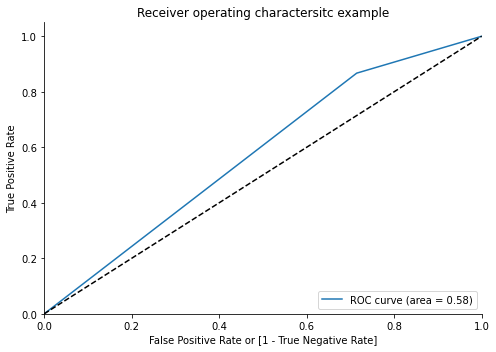

roc_auc_score : 0.58


In [414]:
draw_roc(y_train_df.Class, y_train_df.final_predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.Class, y_train_df.final_predicted)))

In [415]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.Class, y_train_df.final_predicted)))

roc_auc_score : 0.58


     prob  accuracy     sensi     speci
0.0   0.0  0.594042  1.000000  0.000000
0.1   0.1  0.594042  1.000000  0.000000
0.2   0.2  0.596580  0.999325  0.007239
0.3   0.3  0.608469  0.992804  0.046068
0.4   0.4  0.620091  0.958849  0.124383
0.5   0.5  0.631045  0.867101  0.285620
0.6   0.6  0.598851  0.607826  0.585719
0.7   0.7  0.502538  0.232741  0.897335
0.8   0.8  0.423056  0.038678  0.985522
0.9   0.9  0.406225  0.001349  0.998684


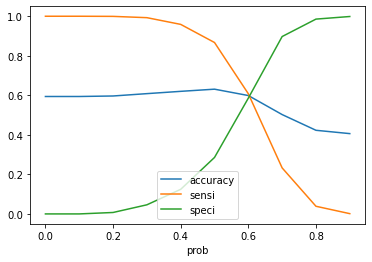

<Figure size 504x360 with 0 Axes>

In [416]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

In [417]:
# predicting with the choosen cut-off on TRAIN
cut_off_prob = 0.5
y_train_df,series_metrics = predictClassWithProb(lg,X_train_lr,y_train_lr,cut_off_prob,model_name='Logistic Regression',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5763608432555032
Sensitivity/Recall : 0.8671014166854059
Specificity: 0.2856202698256005
False Positive Rate: 0.7143797301743995
Positive predictive value: 0.6397876223660196
Negative Predictive value: 0.594928032899246
Precision: 0.6397876223660196
Accuracy: 0.6310446166176863
F1 Score: 0.7362994080580485


In [418]:
# predicting with the choosen cut-off on TEST
cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(lg,X_test_lr,y_test_lr,cut_off_prob,model_name='Logistic Regression',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5615949545181145
Sensitivity/Recall : 0.851569933396765
Specificity: 0.27161997563946405
False Positive Rate: 0.728380024360536
Positive predictive value: 0.5994641661085064
Negative Predictive value: 0.5883905013192612
Precision: 0.5994641661085064
Accuracy: 0.5972222222222222
F1 Score: 0.7036163522012578


## 2. Decision Tree

In [438]:
# Creating Train-Test variables for Decision Tree
X_train_dt = pd.DataFrame(X_train_pca)
y_train_dt = pd.DataFrame(y_train_res)
X_test_dt = pd.DataFrame(X_test_pca)
y_test_dt = y_test

In [439]:
X_train_dt.shape

(6296, 74)

In [440]:
y_train_dt.shape

(6296, 1)

In [441]:
X_test_dt.shape, y_test_dt.shape

((1574, 74), (1574, 1))

In [442]:
##### Applying Decision Tree Classifier on our principal components with Hyperparameter tuning
dt = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=10,
                             random_state=123)

modelfit(dt, X_train_dt, y_train_dt)


Model Report
Accuracy : 0.612
Recall/Sensitivity : 0.533
AUC Score (Train): 0.659874
CV Score : Mean - 0.549 | Std - 0.0113 | Min - 0.538 | Max - 0.561


In [443]:
# make predictions
pred_probs_test = dt.predict(X_test_dt)

#Let's check the model metrices.

getModelMetrics(y_test_dt,pred_probs_test)

Roc_auc_score : 0.5550630988176002
Sensitivity/Recall : 0.4782146652497343
Specificity: 0.631911532385466
False Positive Rate: 0.36808846761453395
Positive predictive value: 0.6588579795021962
Negative Predictive value: 0.4489337822671156
Precision: 0.6588579795021962
Accuracy: 0.5400254129606099
F1 Score: 0.5541871921182266


Model                            
Train/Test                       
Roc_auc_score                0.56
Sensitivity                  0.48
Specificity                  0.63
FPR                          0.37
Positive predictive value    0.66
Negative Predictive value    0.45
Precision                    0.66
Accuracy                     0.54
F1-Score                     0.55
dtype: object

In [444]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10,15,20,30,50],
    'min_samples_leaf': range(100, 500, 50),
    'min_samples_split': range(100, 500, 50),
    'max_features': [5,10,15,20,30,50]
}
# Create a base model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=123)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = my_cv, n_jobs = -1,verbose = 1000,scoring="f1_weighted")

In [445]:
# Fit the grid search to the data
grid_search.fit(X_train_dt, y_train_dt)

Fitting 2 folds for each of 2304 candidates, totalling 4608 fits


GridSearchCV(cv=2,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 30, 50],
                         'max_features': [5, 10, 15, 20, 30, 50],
                         'min_samples_leaf': range(100, 500, 50),
                         'min_samples_split': range(100, 500, 50)},
             scoring='f1_weighted', verbose=1000)

In [446]:
# printing the optimal accuracy score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.5711673641177387 using {'max_depth': 5, 'max_features': 30, 'min_samples_leaf': 150, 'min_samples_split': 450}


In [447]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027433,0.006577,0.009626,0.002877,5,5,100,100,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.53844,0.531917,0.535179,0.003261,742
1,0.021457,0.000046,0.008182,0.000874,5,5,100,150,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.53844,0.531917,0.535179,0.003261,742
2,0.024901,0.002270,0.003131,0.000347,5,5,100,200,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.53844,0.531917,0.535179,0.003261,742


In [448]:
cv_df.nlargest(3,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
271,0.053382,0.002777,0.002589,0.000085,5,30,150,450,"{'max_depth': 5, 'max_features': 30, 'min_samp...",0.569217,0.573118,0.571167,0.001951,1
264,0.049553,0.003619,0.004216,0.001721,5,30,150,100,"{'max_depth': 5, 'max_features': 30, 'min_samp...",0.559195,0.573118,0.566156,0.006962,2
265,0.051033,0.004839,0.005868,0.002083,5,30,150,150,"{'max_depth': 5, 'max_features': 30, 'min_samp...",0.559195,0.573118,0.566156,0.006962,2


In [449]:
grid_search.best_score_

0.5711673641177387

In [450]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_features=30,
                       min_samples_leaf=150, min_samples_split=450,
                       random_state=123)

In [451]:
param_max_depth = cv_df.nlargest(3,"mean_test_score").param_max_depth.iloc[0]
param_max_features = cv_df.nlargest(3,"mean_test_score").param_max_features.iloc[0]
param_min_samples_leaf = cv_df.nlargest(3,"mean_test_score").param_min_samples_leaf.iloc[0]
param_min_samples_split = cv_df.nlargest(3,"mean_test_score").param_min_samples_split.iloc[0]

In [452]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=param_max_depth,
                             max_features=param_max_features,
                             min_samples_leaf=param_min_samples_leaf, 
                             min_samples_split=param_min_samples_split,
                             random_state=123)

In [453]:
modelfit(dt_final,X_train_dt,y_train_dt)


Model Report
Accuracy : 0.578
Recall/Sensitivity : 0.672
AUC Score (Train): 0.609383
CV Score : Mean - 0.564 | Std - 0.000212 | Min - 0.563 | Max - 0.564


In [454]:
# make predictions
pred_probs_test = dt_final.predict(X_test_dt)
#Let's check the model metrices.
getModelMetrics(actual_Class=y_test_dt,pred_Class=pred_probs_test)

Roc_auc_score : 0.5585903202032055
Sensitivity/Recall : 0.6780021253985122
Specificity: 0.4391785150078989
False Positive Rate: 0.5608214849921012
Positive predictive value: 0.6424974823766365
Negative Predictive value: 0.4784853700516351
Precision: 0.6424974823766365
Accuracy: 0.5819567979669632
F1 Score: 0.6597724922440539


Model                            
Train/Test                       
Roc_auc_score                0.56
Sensitivity                  0.68
Specificity                  0.44
FPR                          0.56
Positive predictive value    0.64
Negative Predictive value    0.48
Precision                    0.64
Accuracy                     0.58
F1-Score                     0.66
dtype: object

In [455]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df,series_metrics = predictClassWithProb(dt_final,X_train_dt,y_train_dt,cut_off_prob)

Roc_auc_score : 0.5776175806365864
Sensitivity/Recall : 0.6719872306464485
Specificity: 0.4832479306267245
False Positive Rate: 0.5167520693732756
Positive predictive value: 0.6583268178264269
Negative Predictive value: 0.49857665717771454
Precision: 0.6583268178264269
Accuracy: 0.5959339263024143
F1 Score: 0.6650868878357029


     prob  accuracy     sensi     speci
0.0   0.0  0.597046  1.000000  0.000000
0.1   0.1  0.597046  1.000000  0.000000
0.2   0.2  0.597046  1.000000  0.000000
0.3   0.3  0.597046  1.000000  0.000000
0.4   0.4  0.622935  0.900239  0.212061
0.5   0.5  0.595934  0.671987  0.483248
0.6   0.6  0.447586  0.101091  0.960978
0.7   0.7  0.430432  0.056398  0.984628
0.8   0.8  0.402954  0.000000  1.000000
0.9   0.9  0.402954  0.000000  1.000000


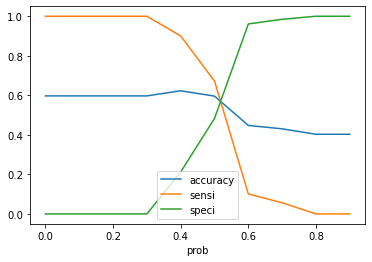

<Figure size 504x360 with 0 Axes>

In [456]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [388]:
# predicting churn with cut-off 0.4
cut_off_prob=0.40
y_train_df,series_metrics = predictClassWithProb(dt_final,X_train_dt,y_train_dt,cut_off_prob,model_name='Decision Tree',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5561504576639242
Sensitivity/Recall : 0.9002394253790902
Specificity: 0.21206148994875837
False Positive Rate: 0.7879385100512416
Positive predictive value: 0.6286457365781163
Negative Predictive value: 0.5892661555312158
Precision: 0.6286457365781163
Accuracy: 0.6229351969504447
F1 Score: 0.7403194049442134


In [389]:
#Lets see how it performs on test data.
y_test_df,series_metrics= predictClassWithProb(dt_final,X_test_dt,y_test_dt,cut_off_prob,model_name='Decision Tree',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.545902564076736
Sensitivity/Recall : 0.9022316684378321
Specificity: 0.1895734597156398
False Positive Rate: 0.8104265402843602
Positive predictive value: 0.6233480176211453
Negative Predictive value: 0.5660377358490566
Precision: 0.6233480176211453
Accuracy: 0.6156289707750953
F1 Score: 0.7372991749891445


# 3. Random Forest

In [300]:
# Creating Train-Test variables for Random Forest
X_train_rf = pd.DataFrame(X_train_pca)
y_train_rf = pd.DataFrame(y_train_res)
X_test_rf = pd.DataFrame(X_test_pca)
y_test_rf = y_test

In [301]:
rf = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=20, oob_score=True)

In [302]:
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=5, n_estimators=20, oob_score=True,
                       random_state=42)

In [303]:
rf.oob_score_

0.6059402795425667

In [304]:
# make predictions
pred_probs_test = rf.predict(X_test_rf)

#Let's check the model metrices.
getModelMetrics(actual_Class=y_test_rf,pred_Class=pred_probs_test)

Roc_auc_score : 0.5316686057150724
Sensitivity/Recall : 0.9574920297555791
Specificity: 0.10584518167456557
False Positive Rate: 0.8941548183254344
Positive predictive value: 0.6141785957736878
Negative Predictive value: 0.6261682242990654
Precision: 0.6141785957736878
Accuracy: 0.6149936467598475
F1 Score: 0.7483388704318936


Model                            
Train/Test                       
Roc_auc_score                0.53
Sensitivity                  0.96
Specificity                  0.11
FPR                          0.89
Positive predictive value    0.61
Negative Predictive value    0.63
Precision                    0.61
Accuracy                     0.61
F1-Score                     0.75
dtype: object

In [305]:
parameters = {'max_depth': range(5, 40, 5)}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="f1_weighted", verbose=1000, return_train_score=True)

grid_search.fit(X_train_rf, y_train_rf)

Fitting 2 folds for each of 7 candidates, totalling 14 fits
[CV 1/2; 1/7] START max_depth=5.................................................
[CV 1/2; 1/7] END ...............................max_depth=5; total time=   0.7s
[CV 2/2; 1/7] START max_depth=5.................................................
[CV 2/2; 1/7] END ...............................max_depth=5; total time=   0.7s
[CV 1/2; 2/7] START max_depth=10................................................
[CV 1/2; 2/7] END ..............................max_depth=10; total time=   1.1s
[CV 2/2; 2/7] START max_depth=10................................................
[CV 2/2; 2/7] END ..............................max_depth=10; total time=   1.1s
[CV 1/2; 3/7] START max_depth=15................................................
[CV 1/2; 3/7] END ..............................max_depth=15; total time=   1.4s
[CV 2/2; 3/7] START max_depth=15................................................
[CV 2/2; 3/7] END ..............................m

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(5, 40, 5)}, return_train_score=True,
             scoring='f1_weighted', verbose=1000)

In [306]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
4,1.439496,0.044405,0.038493,0.000050,25,{'max_depth': 25},0.581375,0.563213,0.572294,0.009081,1,1.000000,1.000000,1.000000,0.000000
3,1.432112,0.023316,0.038379,0.000256,20,{'max_depth': 20},0.575077,0.569106,0.572091,0.002985,2,1.000000,1.000000,1.000000,0.000000
5,1.457207,0.034353,0.039387,0.000435,30,{'max_depth': 30},0.571677,0.563339,0.567508,0.004169,3,1.000000,1.000000,1.000000,0.000000
2,1.369473,0.014043,0.036039,0.000202,15,{'max_depth': 15},0.565543,0.557243,0.561393,0.004150,4,0.996503,0.991408,0.993955,0.002548
6,1.452285,0.036723,0.038850,0.000545,35,{'max_depth': 35},0.558116,0.553545,0.555831,0.002285,5,1.000000,1.000000,1.000000,0.000000
1,1.114136,0.004145,0.029441,0.000322,10,{'max_depth': 10},0.547400,0.531243,0.539321,0.008079,6,0.903224,0.858973,0.881098,0.022125
0,0.689531,0.022474,0.019748,0.000230,5,{'max_depth': 5},0.498395,0.499026,0.498711,0.000316,7,0.598587,0.629356,0.613972,0.015384


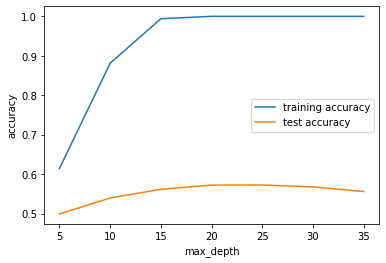

In [307]:
# grid_search.cv_results_

plot_traintestAcc(grid_search.cv_results_,'max_depth')

In [308]:
my_max_depth = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_max_depth'].iloc[0]

### Tuning n_estimators

In [309]:
parameters = {'n_estimators': range(5, 70, 5)}

rf = RandomForestClassifier(max_depth=my_max_depth,random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="f1_weighted", verbose=100, return_train_score=True)


grid_search.fit(X_train_rf, y_train_rf)

Fitting 2 folds for each of 13 candidates, totalling 26 fits
[CV 1/2; 1/13] START n_estimators=5.............................................
[CV 1/2; 1/13] END ...........................n_estimators=5; total time=   0.1s
[CV 2/2; 1/13] START n_estimators=5.............................................
[CV 2/2; 1/13] END ...........................n_estimators=5; total time=   0.1s
[CV 1/2; 2/13] START n_estimators=10............................................
[CV 1/2; 2/13] END ..........................n_estimators=10; total time=   0.2s
[CV 2/2; 2/13] START n_estimators=10............................................
[CV 2/2; 2/13] END ..........................n_estimators=10; total time=   0.2s
[CV 1/2; 3/13] START n_estimators=15............................................
[CV 1/2; 3/13] END ..........................n_estimators=15; total time=   0.2s
[CV 2/2; 3/13] START n_estimators=15............................................
[CV 2/2; 3/13] END ..........................n_e

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=25, random_state=10),
             param_grid={'n_estimators': range(5, 70, 5)},
             return_train_score=True, scoring='f1_weighted', verbose=100)

In [310]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
11,0.936309,0.015274,0.025088,0.000596,60,{'n_estimators': 60},0.570637,0.573660,0.572148,0.001511,1,1.0,1.0,1.0,0.0
9,0.731447,0.027633,0.020522,0.000089,50,{'n_estimators': 50},0.568946,0.567205,0.568075,0.000871,2,1.0,1.0,1.0,0.0
5,0.434119,0.009102,0.013331,0.000069,30,{'n_estimators': 30},0.576996,0.558274,0.567635,0.009361,3,1.0,1.0,1.0,0.0
12,0.985317,0.043319,0.026512,0.000416,65,{'n_estimators': 65},0.561725,0.567908,0.564817,0.003092,4,1.0,1.0,1.0,0.0
10,0.798965,0.027977,0.022321,0.000072,55,{'n_estimators': 55},0.560063,0.569499,0.564781,0.004718,5,1.0,1.0,1.0,0.0


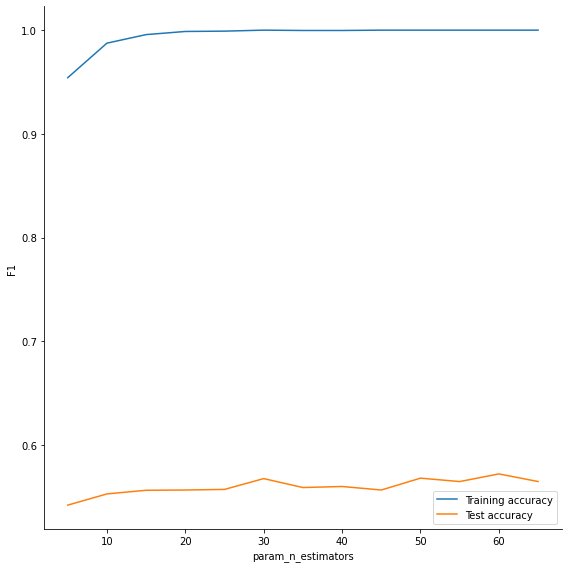

In [311]:
random_forst_feature_graph(grid_search, "n_estimators")

In [312]:
my_n_estimator = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_n_estimators'].iloc[0]

### Tuning max_features

In [313]:
parameters = {'max_features': [5, 10, 15, 20, 25, 30,50,70]}

rf = RandomForestClassifier(max_depth=my_max_depth,n_estimators = my_n_estimator,random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="f1_weighted", verbose=1000, return_train_score=True)


grid_search.fit(X_train_rf, y_train_rf)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2; 1/8] START max_features=5..............................................
[CV 1/2; 1/8] END ............................max_features=5; total time=   0.6s
[CV 2/2; 1/8] START max_features=5..............................................
[CV 2/2; 1/8] END ............................max_features=5; total time=   0.7s
[CV 1/2; 2/8] START max_features=10.............................................
[CV 1/2; 2/8] END ...........................max_features=10; total time=   1.1s
[CV 2/2; 2/8] START max_features=10.............................................
[CV 2/2; 2/8] END ...........................max_features=10; total time=   1.1s
[CV 1/2; 3/8] START max_features=15.............................................
[CV 1/2; 3/8] END ...........................max_features=15; total time=   1.5s
[CV 2/2; 3/8] START max_features=15.............................................
[CV 2/2; 3/8] END ...........................max_

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=25, n_estimators=60,
                                              random_state=10),
             param_grid={'max_features': [5, 10, 15, 20, 25, 30, 50, 70]},
             return_train_score=True, scoring='f1_weighted', verbose=1000)

In [314]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
5,2.922598,0.139473,0.023106,0.000081,30,{'max_features': 30},0.580449,0.575373,0.577911,0.002538,1,1.0,1.000000,1.000000,0.000000
1,1.095583,0.024344,0.025073,0.000833,10,{'max_features': 10},0.583354,0.569833,0.576593,0.006761,2,1.0,0.999682,0.999841,0.000159
7,6.594081,0.289294,0.022824,0.000253,70,{'max_features': 70},0.574499,0.576483,0.575491,0.000992,3,1.0,1.000000,1.000000,0.000000
6,4.689053,0.093080,0.022845,0.000008,50,{'max_features': 50},0.571586,0.574989,0.573288,0.001702,4,1.0,1.000000,1.000000,0.000000
2,1.505518,0.048782,0.023737,0.000457,15,{'max_features': 15},0.569473,0.573407,0.571440,0.001967,5,1.0,1.000000,1.000000,0.000000
4,2.522582,0.065804,0.024707,0.000922,25,{'max_features': 25},0.572107,0.564676,0.568391,0.003716,6,1.0,1.000000,1.000000,0.000000
0,0.623333,0.030786,0.026291,0.000581,5,{'max_features': 5},0.573669,0.560694,0.567181,0.006487,7,1.0,1.000000,1.000000,0.000000
3,1.976071,0.065216,0.023533,0.000286,20,{'max_features': 20},0.565287,0.566414,0.565851,0.000564,8,1.0,1.000000,1.000000,0.000000


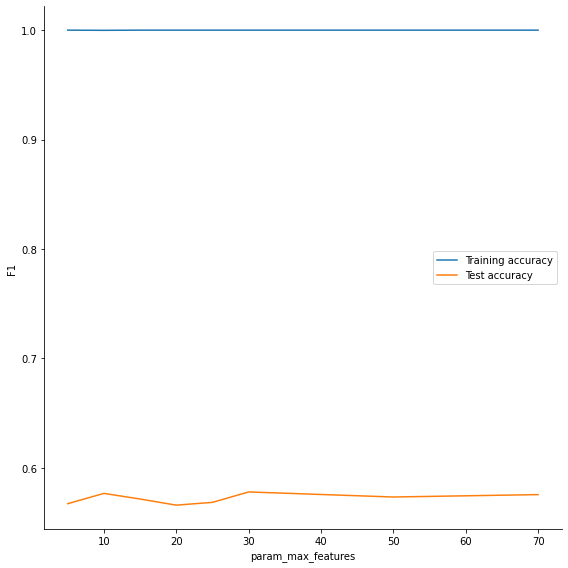

In [315]:
random_forst_feature_graph(grid_search, "max_features")

In [316]:
my_max_features=pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_max_features'].iloc[0]

### Tuning min_samples_leaf

In [317]:
parameters = {'min_samples_leaf': range(1, 500, 50)}

rf = RandomForestClassifier(max_depth=my_max_depth,n_estimators = my_n_estimator, max_features = my_max_features, random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="f1_weighted", verbose=1000, return_train_score=True)

grid_search.fit(X_train_rf, y_train_rf)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2; 1/10] START min_samples_leaf=1.........................................
[CV 1/2; 1/10] END .......................min_samples_leaf=1; total time=   2.9s
[CV 2/2; 1/10] START min_samples_leaf=1.........................................
[CV 2/2; 1/10] END .......................min_samples_leaf=1; total time=   3.1s
[CV 1/2; 2/10] START min_samples_leaf=51........................................
[CV 1/2; 2/10] END ......................min_samples_leaf=51; total time=   1.5s
[CV 2/2; 2/10] START min_samples_leaf=51........................................
[CV 2/2; 2/10] END ......................min_samples_leaf=51; total time=   1.6s
[CV 1/2; 3/10] START min_samples_leaf=101.......................................
[CV 1/2; 3/10] END .....................min_samples_leaf=101; total time=   1.2s
[CV 2/2; 3/10] START min_samples_leaf=101.......................................
[CV 2/2; 3/10] END .....................min_samp

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=25, max_features=30,
                                              n_estimators=60,
                                              random_state=10),
             param_grid={'min_samples_leaf': range(1, 500, 50)},
             return_train_score=True, scoring='f1_weighted', verbose=1000)

In [318]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,2.996785,0.087370,0.024487,0.000562,1,{'min_samples_leaf': 1},0.580449,0.575373,0.577911,0.002538,1,1.000000,1.000000,1.000000,0.000000
1,1.577302,0.044184,0.016378,0.000290,51,{'min_samples_leaf': 51},0.548939,0.548259,0.548599,0.000340,2,0.666025,0.643927,0.654976,0.011049
2,1.249141,0.082651,0.014789,0.000558,101,{'min_samples_leaf': 101},0.533444,0.516858,0.525151,0.008293,3,0.589871,0.572112,0.580991,0.008880
3,1.003448,0.022204,0.013534,0.000147,151,{'min_samples_leaf': 151},0.523598,0.501562,0.512580,0.011018,4,0.564762,0.541695,0.553228,0.011533
4,0.880541,0.018494,0.012533,0.000063,201,{'min_samples_leaf': 201},0.497722,0.470879,0.484300,0.013422,5,0.527522,0.498178,0.512850,0.014672
5,0.752452,0.024501,0.012099,0.000039,251,{'min_samples_leaf': 251},0.477155,0.461064,0.469110,0.008046,6,0.497121,0.473480,0.485301,0.011821
6,0.689918,0.007494,0.011793,0.000028,301,{'min_samples_leaf': 301},0.457965,0.455943,0.456954,0.001011,7,0.466893,0.463061,0.464977,0.001916
7,0.606319,0.021924,0.011361,0.000033,351,{'min_samples_leaf': 351},0.447521,0.448228,0.447875,0.000354,8,0.453901,0.453790,0.453846,0.000056
8,0.545885,0.017558,0.011065,0.000113,401,{'min_samples_leaf': 401},0.447893,0.446211,0.447052,0.000841,9,0.449099,0.448043,0.448571,0.000528
9,0.520427,0.005228,0.011140,0.000158,451,{'min_samples_leaf': 451},0.446597,0.446211,0.446404,0.000193,10,0.446211,0.446597,0.446404,0.000193


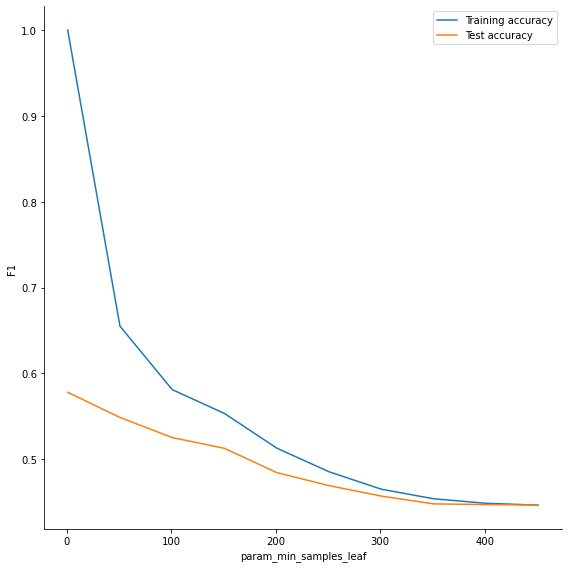

In [319]:
random_forst_feature_graph(grid_search, "min_samples_leaf")

In [320]:
my_min_sample_leaf = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_min_samples_leaf'].iloc[0]

### Tuning min_samples_split

In [321]:
parameters = {'min_samples_split': range(50, 550, 50)}

rf = RandomForestClassifier(max_depth=my_max_depth,n_estimators = my_n_estimator, max_features = my_max_features, min_samples_leaf = my_min_sample_leaf,random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="f1_weighted", verbose=1000, return_train_score=True)


grid_search.fit(X_train_rf, y_train_rf)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2; 1/10] START min_samples_split=50.......................................
[CV 1/2; 1/10] END .....................min_samples_split=50; total time=   2.4s
[CV 2/2; 1/10] START min_samples_split=50.......................................
[CV 2/2; 1/10] END .....................min_samples_split=50; total time=   2.5s
[CV 1/2; 2/10] START min_samples_split=100......................................
[CV 1/2; 2/10] END ....................min_samples_split=100; total time=   2.1s
[CV 2/2; 2/10] START min_samples_split=100......................................
[CV 2/2; 2/10] END ....................min_samples_split=100; total time=   2.2s
[CV 1/2; 3/10] START min_samples_split=150......................................
[CV 1/2; 3/10] END ....................min_samples_split=150; total time=   1.9s
[CV 2/2; 3/10] START min_samples_split=150......................................
[CV 2/2; 3/10] END ....................min_sampl

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=25, max_features=30,
                                              n_estimators=60,
                                              random_state=10),
             param_grid={'min_samples_split': range(50, 550, 50)},
             return_train_score=True, scoring='f1_weighted', verbose=1000)

In [322]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,2.447808,0.070347,0.019268,0.000172,50,{'min_samples_split': 50},0.569331,0.572613,0.570972,0.001641,1,0.896481,0.875850,0.886166,0.010316
1,2.124095,0.068127,0.017357,0.000113,100,{'min_samples_split': 100},0.558629,0.560277,0.559453,0.000824,2,0.762433,0.733468,0.747951,0.014482
2,1.907650,0.067522,0.016129,0.000053,150,{'min_samples_split': 150},0.559208,0.551184,0.555196,0.004012,3,0.704863,0.670092,0.687478,0.017386
3,1.741883,0.087840,0.015424,0.000154,200,{'min_samples_split': 200},0.549804,0.538097,0.543950,0.005853,4,0.657544,0.649830,0.653687,0.003857
4,1.646131,0.094730,0.014771,0.000026,250,{'min_samples_split': 250},0.550395,0.533693,0.542044,0.008351,5,0.633594,0.626654,0.630124,0.003470
5,1.564573,0.073729,0.014409,0.000252,300,{'min_samples_split': 300},0.544999,0.530557,0.537778,0.007221,6,0.607302,0.611917,0.609610,0.002308
6,1.451581,0.080255,0.013512,0.000099,350,{'min_samples_split': 350},0.533482,0.524828,0.529155,0.004327,7,0.582828,0.598704,0.590766,0.007938
8,1.339015,0.073922,0.013100,0.000304,450,{'min_samples_split': 450},0.535449,0.518054,0.526751,0.008698,8,0.567948,0.579577,0.573763,0.005815
7,1.408705,0.057446,0.013330,0.000126,400,{'min_samples_split': 400},0.529605,0.523559,0.526582,0.003023,9,0.573195,0.587672,0.580433,0.007239
9,1.267883,0.101677,0.012598,0.000150,500,{'min_samples_split': 500},0.528377,0.515713,0.522045,0.006332,10,0.561105,0.572252,0.566678,0.005573


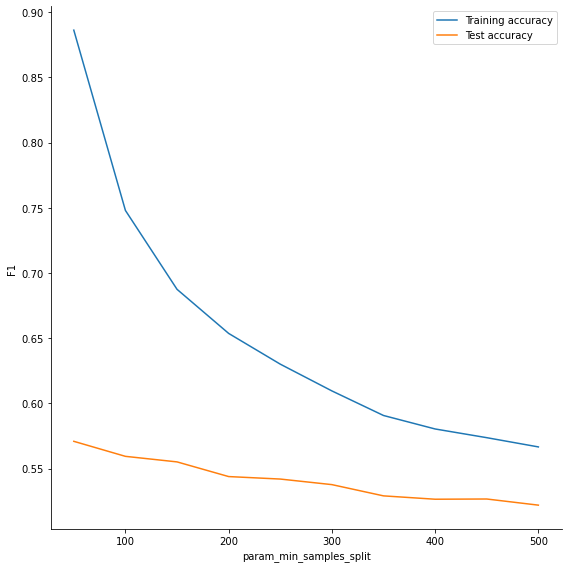

In [323]:
random_forst_feature_graph(grid_search, "min_samples_split")

In [324]:
my_min_samples_split=pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_min_samples_split'].iloc[0]

### Final Model

In [325]:
rf_final = RandomForestClassifier(max_depth=my_max_depth,
                                  n_estimators = my_n_estimator, 
                                  max_features = my_max_features, 
                                  min_samples_leaf = my_min_sample_leaf,
                                  min_samples_split=my_min_samples_split,
                                  random_state=123)

In [326]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_rf,y_train_rf)

Model performance on Train data:

Model Report
Accuracy : 0.873
Recall/Sensitivity : 0.985
AUC Score (Train): 0.979242
CV Score : Mean - 0.6 | Std - 0.00674 | Min - 0.593 | Max - 0.607


In [327]:
# predict on test data
predictions = rf_final.predict(X_test_rf)

In [328]:
print("Model performance on Test data:")
getModelMetrics(y_test_rf,predictions)

Model performance on Test data:
Roc_auc_score : 0.564000349196596
Sensitivity/Recall : 0.8278427205100957
Specificity: 0.3001579778830964
False Positive Rate: 0.6998420221169036
Positive predictive value: 0.6374795417348609
Negative Predictive value: 0.5397727272727273
Precision: 0.6374795417348609
Accuracy: 0.6156289707750953
F1 Score: 0.7202958853444291


Model                            
Train/Test                       
Roc_auc_score                0.56
Sensitivity                  0.83
Specificity                   0.3
FPR                           0.7
Positive predictive value    0.64
Negative Predictive value    0.54
Precision                    0.64
Accuracy                     0.62
F1-Score                     0.72
dtype: object

In [329]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(rf_final,X_train_rf,y_train_rf,cut_off_prob)

Roc_auc_score : 0.8733158931244032
Sensitivity/Recall : 0.9851024208566108
Specificity: 0.7615293653921955
False Positive Rate: 0.2384706346078045
Positive predictive value: 0.8595636025998143
Negative Predictive value: 0.971830985915493
Precision: 0.8595636025998143
Accuracy: 0.895012706480305
F1 Score: 0.9180612371389613


     prob  accuracy     sensi     speci
0.0   0.0  0.597046  1.000000  0.000000
0.1   0.1  0.597046  1.000000  0.000000
0.2   0.2  0.598475  1.000000  0.003547
0.3   0.3  0.618170  1.000000  0.052424
0.4   0.4  0.739041  1.000000  0.352385
0.5   0.5  0.895013  0.985102  0.761529
0.6   0.6  0.897713  0.852620  0.964525
0.7   0.7  0.703621  0.504922  0.998029
0.8   0.8  0.476811  0.123969  0.999606
0.9   0.9  0.409149  0.010375  1.000000


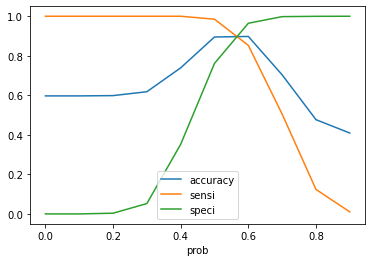

<Figure size 504x360 with 0 Axes>

In [330]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [331]:
## Training Data 
cut_off_prob=0.25

y_train_df,series_metrics=predictClassWithProb(rf_final,X_train_rf,y_train_rf,cut_off_prob,model_name='Random Forest',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)
y_train_df.head()

Roc_auc_score : 0.5068979109184075
Sensitivity/Recall : 1.0
Specificity: 0.013795821836815136
False Positive Rate: 0.9862041781631848
Positive predictive value: 0.6003833253473886
Negative Predictive value: 1.0
Precision: 0.6003833253473886
Accuracy: 0.6026048284625158
F1 Score: 0.7502994011976049


,Class,Class_Prob,final_predicted
0,1,0.604353,1
1,1,0.675316,1
2,1,0.732021,1
3,1,0.711547,1
4,0,0.311041,1


In [332]:
# Testing Data
y_test_df,series_metrics= predictClassWithProb(rf_final,X_test_rf,y_test_rf,cut_off_prob,model_name='Random Forest',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5023696682464456
Sensitivity/Recall : 1.0
Specificity: 0.004739336492890996
False Positive Rate: 0.995260663507109
Positive predictive value: 0.5989815404201145
Negative Predictive value: 1.0
Precision: 0.5989815404201145
Accuracy: 0.5997458703939009
F1 Score: 0.7492038216560508


# 4. Gradient Boosting

In [333]:
# Creating Train-Test variables for Gradient Boosting
X_train_gb = pd.DataFrame(X_train_pca)
y_train_gb = pd.DataFrame(y_train_res)
X_test_gb = pd.DataFrame(X_test_pca)
y_test_gb = y_test


In [334]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

# Fitting the default GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=10)
modelfit(gbm, X_train_gb, y_train_gb)


Model Report
Accuracy : 0.663
Recall/Sensitivity : 0.942
AUC Score (Train): 0.816187
CV Score : Mean - 0.594 | Std - 0.00563 | Min - 0.589 | Max - 0.6


In [393]:
param = {'n_estimators':range(10,170,20), 
         'max_depth':range(4,18,2), 
         'min_samples_split':range(250,801,250), 
        'max_features':range(5,550,50)}


gbm = GradientBoostingClassifier(random_state=10)
grid_search = GridSearchCV(estimator = gbm, param_grid = param, scoring='f1_weighted',n_jobs=-1,verbose=1000, cv=my_cv)


grid_search.fit(X_train_gb, y_train_gb.values.ravel())

Fitting 2 folds for each of 1848 candidates, totalling 3696 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': range(4, 18, 2),
                         'max_features': range(5, 550, 50),
                         'min_samples_split': range(250, 801, 250),
                         'n_estimators': range(10, 170, 20)},
             scoring='f1_weighted', verbose=1000)

In [394]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_split': 250,
 'n_estimators': 90}

In [395]:
grid_search.best_score_

0.5837275448832777

In [396]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
796,1.238487,0.042156,0.012461,0.000772,10,5,250,90,"{'max_depth': 10, 'max_features': 5, 'min_samp...",0.586438,0.581017,0.583728,0.002710,1
839,16.762649,0.016356,0.019760,0.001098,10,55,750,150,"{'max_depth': 10, 'max_features': 55, 'min_sam...",0.583744,0.579535,0.581640,0.002105,2
1621,13.874457,0.621220,0.015749,0.001506,16,55,500,110,"{'max_depth': 16, 'max_features': 55, 'min_sam...",0.586455,0.576619,0.581537,0.004918,3
1323,1.121152,0.004501,0.015901,0.000424,14,5,250,70,"{'max_depth': 14, 'max_features': 5, 'min_samp...",0.578855,0.581537,0.580196,0.001341,4
795,0.929725,0.014360,0.015938,0.003065,10,5,250,70,"{'max_depth': 10, 'max_features': 5, 'min_samp...",0.580183,0.580200,0.580191,0.000009,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,0.008825,0.000322,0.000000,0.000000,8,305,750,50,"{'max_depth': 8, 'max_features': 305, 'min_sam...",NaN,NaN,NaN,NaN,1844
689,0.008022,0.000059,0.000000,0.000000,8,305,750,30,"{'max_depth': 8, 'max_features': 305, 'min_sam...",NaN,NaN,NaN,NaN,1845
688,0.008363,0.000731,0.000000,0.000000,8,305,750,10,"{'max_depth': 8, 'max_features': 305, 'min_sam...",NaN,NaN,NaN,NaN,1846
698,0.008532,0.001072,0.000000,0.000000,8,355,250,50,"{'max_depth': 8, 'max_features': 355, 'min_sam...",NaN,NaN,NaN,NaN,1847


In [399]:
md_gb = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_max_depth'].iloc[0]
param_min_samples_split_gd = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_min_samples_split'].iloc[0]
param_n_estimators_gd = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_n_estimators'].iloc[0]
param_max_features_gd = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_max_features'].iloc[0]

In [400]:
# GradientBoostingClassifier with tuned Parameters
gbm_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=param_n_estimators_gd, max_features=param_max_features_gd, max_depth=md_gb, 
                                       min_samples_split=param_min_samples_split_gd, random_state=10)

modelfit(gbm_final, X_train_gb, y_train_gb)


Model Report
Accuracy : 0.882
Recall/Sensitivity : 0.986
AUC Score (Train): 0.978698
CV Score : Mean - 0.592 | Std - 0.00407 | Min - 0.588 | Max - 0.596


In [401]:
# predictions on Test data
dtest_predictions = gbm_final.predict(X_test_gb)

# model Performance on test data
getModelMetrics(y_test_gb,dtest_predictions)

Roc_auc_score : 0.575791610216015
Sensitivity/Recall : 0.8150903294367694
Specificity: 0.33649289099526064
False Positive Rate: 0.6635071090047393
Positive predictive value: 0.6461668070766639
Negative Predictive value: 0.5503875968992248
Precision: 0.6461668070766639
Accuracy: 0.6226175349428208
F1 Score: 0.7208646616541353


Model                            
Train/Test                       
Roc_auc_score                0.58
Sensitivity                  0.82
Specificity                  0.34
FPR                          0.66
Positive predictive value    0.65
Negative Predictive value    0.55
Precision                    0.65
Accuracy                     0.62
F1-Score                     0.72
dtype: object

In [402]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(gbm_final,X_train_gb,y_train_gb,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8815341931171783
Sensitivity/Recall : 0.9861665336525671
Specificity: 0.7769018525817896
False Positive Rate: 0.2230981474182105
Positive predictive value: 0.8675403697636321
Negative Predictive value: 0.9742956005931784
Precision: 0.8675403697636321
Accuracy: 0.9018424396442185
F1 Score: 0.9230577689243028


,Class,Class_Prob,final_predicted
0,1,0.678261,1
1,1,0.817887,1
2,1,0.817796,1
3,1,0.717179,1
4,0,0.190297,0


     prob  accuracy     sensi     speci
0.0   0.0  0.597046  1.000000  0.000000
0.1   0.1  0.598634  1.000000  0.003942
0.2   0.2  0.625159  1.000000  0.069767
0.3   0.3  0.706321  1.000000  0.271186
0.4   0.4  0.808609  1.000000  0.525030
0.5   0.5  0.901842  0.986167  0.776902
0.6   0.6  0.921537  0.913275  0.933780
0.7   0.7  0.791773  0.658952  0.988569
0.8   0.8  0.557020  0.258579  0.999212
0.9   0.9  0.417726  0.024741  1.000000


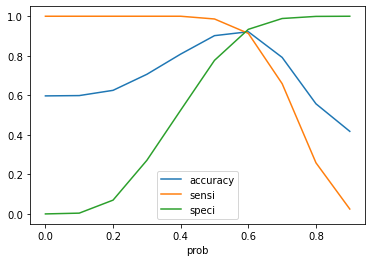

<Figure size 504x360 with 0 Axes>

In [403]:
findOptimalCutoff(y_train_df)

In [436]:
cut_off_prob=0.30
y_train_df,series_metrics = predictClassWithProb(gbm_final,X_train_gb,y_train_gb,cut_off_prob,model_name='Gradient Boosting',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.6355932203389831
Sensitivity/Recall : 1.0
Specificity: 0.2711864406779661
False Positive Rate: 0.7288135593220338
Positive predictive value: 0.6702924393723253
Negative Predictive value: 1.0
Precision: 0.6702924393723253
Accuracy: 0.7063214739517154
F1 Score: 0.8026048895057116


In [437]:
y_test_df,series_metrics= predictClassWithProb(gbm_final,X_test_gb,y_test_gb,cut_off_prob,model_name='Gradient Boosting',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5183403760242961
Sensitivity/Recall : 0.9798087141339001
Specificity: 0.05687203791469194
False Positive Rate: 0.943127962085308
Positive predictive value: 0.6069782751810402
Negative Predictive value: 0.6545454545454545
Precision: 0.6069782751810402
Accuracy: 0.6086404066073697
F1 Score: 0.7495934959349595


# 5. XG Boosting

In [345]:
X_train_pca = X_train_pca_std
X_test_pca = X_test_pca_std

In [346]:
# Creating Train-Test variables for XGBoost
X_train_xgb = pd.DataFrame(X_train_pca)
y_train_xgb = pd.DataFrame(y_train)
X_test_xgb = pd.DataFrame(X_test_pca)
y_test_xgb = y_test

In [347]:
# Fitting the XGBClassifier without HyperParameter Tuning
xgb = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    nthread=-1,
                    seed=27)

In [348]:
# Model fit and performance on Train data
modelfit(xgb, X_train_xgb, y_train_xgb)

[22:39:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

In [349]:
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                                     min_child_weight=1, gamma=0, subsample=0.8, 
                                                     colsample_bytree=0.8,
                                                     nthread=-1, scale_pos_weight=1, seed=27), 
                           param_grid = param_test1, scoring='f1',n_jobs=-1, cv=my_cv)

grid_search.fit(X_train_xgb, y_train_xgb)

[22:40:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method

In [350]:
grid_search.best_params_

{'max_depth': 3, 'min_child_weight': 1}

In [351]:
grid_search.best_score_

0.7090885931075641

In [352]:
my_md = grid_search.best_params_['max_depth']
my_min_child_weight = grid_search.best_params_['min_child_weight']

In [353]:

param_test2 = {'gamma':[i/10.0 for i in range(0,5)]}
grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=my_md,
                                                     min_child_weight=my_min_child_weight, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                                                     objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,seed=27), 
                           param_grid = param_test2, scoring='f1',n_jobs=-1, cv=my_cv)

grid_search.fit(X_train_xgb, y_train_xgb)

[22:40:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method

In [354]:
grid_search.best_params_

{'gamma': 0.0}

In [355]:
my_gamma = grid_search.best_params_['gamma']

In [356]:
 grid_search.best_score_

0.7090885931075641

In [357]:
# Final XGBClassifier
xgb = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=my_md,
                    min_child_weight=my_min_child_weight, gamma=my_gamma, subsample=0.8, colsample_bytree=0.8,
                    objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [358]:
# Fit Train data
modelfit(xgb, X_train_xgb, y_train_xgb)

[22:40:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:40:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

In [359]:
# Prediction on Test data
dtest_predictions = xgb.predict(X_test_xgb)

In [360]:
# Model evaluation on Test data
getModelMetrics(y_test_xgb,dtest_predictions)

Roc_auc_score : 0.5656800183999745
Sensitivity/Recall : 0.8501594048884166
Specificity: 0.2812006319115324
False Positive Rate: 0.7187993680884676
Positive predictive value: 0.6374501992031872
Negative Predictive value: 0.5579937304075235
Precision: 0.6374501992031872
Accuracy: 0.6213468869123253
F1 Score: 0.7285974499089253


Model                            
Train/Test                       
Roc_auc_score                0.57
Sensitivity                  0.85
Specificity                  0.28
FPR                          0.72
Positive predictive value    0.64
Negative Predictive value    0.56
Precision                    0.64
Accuracy                     0.62
F1-Score                     0.73
dtype: object

In [361]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(xgb,X_train_xgb,y_train_xgb,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.6937862859265211
Sensitivity/Recall : 0.9334929502527268
Specificity: 0.45407962160031534
False Positive Rate: 0.5459203783996847
Positive predictive value: 0.7170004086636698
Negative Predictive value: 0.8216833095577746
Precision: 0.7170004086636698
Accuracy: 0.7403113087674714
F1 Score: 0.8110481913787125


,Class,Class_Prob,final_predicted
5760,1,0.621483,1
1270,1,0.790383,1
4820,1,0.658021,1
1896,1,0.804260,1
14152,0,0.131628,0


     prob  accuracy     sensi     speci
0.0   0.0  0.597046  1.000000  0.000000
0.1   0.1  0.598316  1.000000  0.003153
0.2   0.2  0.604828  1.000000  0.019314
0.3   0.3  0.632624  1.000000  0.088293
0.4   0.4  0.687262  0.992551  0.234923
0.5   0.5  0.740311  0.933493  0.454080
0.6   0.6  0.756671  0.753126  0.761924
0.7   0.7  0.609117  0.368715  0.965313
0.8   0.8  0.452033  0.083533  0.998029
0.9   0.9  0.405654  0.004522  1.000000


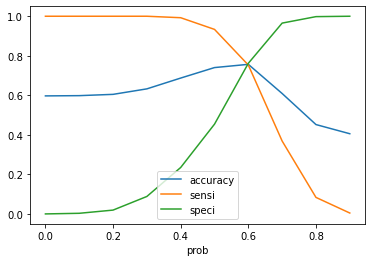

<Figure size 504x360 with 0 Axes>

In [362]:
# Finding optimal cut-off probability
findOptimalCutoff(y_train_df)

In [363]:
# Selecting 0.5 as cut-off
cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(xgb,X_train_xgb,y_train_xgb,cut_off_prob,model_name='XGBoost',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.6937862859265211
Sensitivity/Recall : 0.9334929502527268
Specificity: 0.45407962160031534
False Positive Rate: 0.5459203783996847
Positive predictive value: 0.7170004086636698
Negative Predictive value: 0.8216833095577746
Precision: 0.7170004086636698
Accuracy: 0.7403113087674714
F1 Score: 0.8110481913787125


In [364]:
y_test_df,series_metrics= predictClassWithProb(xgb,X_test_xgb,y_test_xgb,cut_off_prob,model_name='XGBoost',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5656800183999745
Sensitivity/Recall : 0.8501594048884166
Specificity: 0.2812006319115324
False Positive Rate: 0.7187993680884676
Positive predictive value: 0.6374501992031872
Negative Predictive value: 0.5579937304075235
Precision: 0.6374501992031872
Accuracy: 0.6213468869123253
F1 Score: 0.7285974499089253
